# EDA and preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [5]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(train.head(5))

   id cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9 cat10 cat11 cat12 cat13  \
0   1    A    B    A    B    A    A    A    A    B     A     B     A     A   
1   2    A    B    A    A    A    A    A    A    B     B     A     A     A   
2   5    A    B    A    A    B    A    A    A    B     B     B     B     B   
3  10    B    B    A    B    A    A    A    A    B     A     A     A     A   
4  11    A    B    A    B    A    A    A    A    B     B     A     B     A   

  cat14 cat15 cat16 cat17 cat18 cat19 cat20 cat21 cat22 cat23 cat24 cat25  \
0     A     A     A     A     A     A     A     A     A     B     A     A   
1     A     A     A     A     A     A     A     A     A     A     A     A   
2     A     A     A     A     A     A     A     A     A     A     A     A   
3     A     A     A     A     A     A     A     A     A     B     A     A   
4     A     A     A     A     A     A     A     A     A     B     A     A   

  cat26 cat27 cat28 cat29 cat30 cat31 cat32 cat33 cat34 cat35 cat36 

Printing the whole data shows us that this data has 1 id variable, 116 categorical variables, 14 continuous variables, and 1 target variable. 

In [6]:
test.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,cat41,cat42,cat43,cat44,cat45,cat46,cat47,cat48,cat49,cat50,cat51,cat52,cat53,cat54,cat55,cat56,cat57,cat58,cat59,cat60,cat61,cat62,cat63,cat64,cat65,cat66,cat67,cat68,cat69,cat70,cat71,cat72,cat73,cat74,cat75,cat76,cat77,cat78,cat79,cat80,cat81,cat82,cat83,cat84,cat85,cat86,cat87,cat88,cat89,cat90,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,4,A,B,A,A,A,A,A,A,B,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,D,D,B,B,C,B,D,B,A,A,A,A,A,D,C,C,E,C,D,T,H,G,A,A,G,E,I,L,K,BI,BC,A,J,AX,A,Q,HG,0.321594,0.299102,0.246911,0.402922,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562
1,6,A,B,A,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,B,A,D,B,B,D,D,B,B,C,B,B,B,A,A,A,A,A,D,D,D,E,A,A,P,B,D,A,A,G,G,G,F,B,BI,CO,E,G,X,A,L,HK,0.634734,0.620805,0.654310,0.946616,0.836443,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045
2,9,A,B,A,B,B,A,B,A,B,B,A,B,B,B,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,B,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,D,B,B,B,B,B,D,C,B,B,B,A,B,A,A,A,D,D,C,E,E,A,D,G,Q,A,D,D,E,J,G,A,BI,CS,C,U,AE,A,K,CK,0.290813,0.737068,0.711159,0.412789,0.718531,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232
3,12,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,B,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,D,B,D,B,D,B,B,A,B,D,D,A,A,A,G,H,D,D,C,E,E,D,T,G,A,A,D,E,E,I,K,K,BI,CR,A,AY,AJ,A,P,DJ,0.268622,0.681761,0.592681,0.354893,0.397069,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955
4,15,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,D,D,B,B,C,B,B,B,A,A,A,A,A,D,B,D,E,A,A,P,A,A,A,A,F,E,G,E,B,AB,EG,A,E,I,C,J,HA,0.553846,0.299102,0.263570,0.696873,0.302678,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823


In [7]:
print('Train data dimensions:', train.shape)
print('Test data dimensions:', test.shape)

Train data dimensions: (188318, 132)
Test data dimensions: (125546, 131)


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 132 entries, id to loss
dtypes: float64(15), int64(1), object(116)
memory usage: 189.7+ MB


In [9]:
print("Number missing:", train.isnull().sum().sum())

Number missing: 0


##### There are no missing values which is good. 

In [10]:
features = [x for x in train.columns if x not in ['id', 'loss']]
cat_features = [x for x in train.select_dtypes(include =['object']).columns if x not in ['id', 'loss']]
num_features = [x for x in train.select_dtypes(exclude =['object']).columns if x not in ['id', 'loss']]

print('Categorical:',cat_features)
print('Numeric:',num_features)

Categorical: ['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16', 'cat17', 'cat18', 'cat19', 'cat20', 'cat21', 'cat22', 'cat23', 'cat24', 'cat25', 'cat26', 'cat27', 'cat28', 'cat29', 'cat30', 'cat31', 'cat32', 'cat33', 'cat34', 'cat35', 'cat36', 'cat37', 'cat38', 'cat39', 'cat40', 'cat41', 'cat42', 'cat43', 'cat44', 'cat45', 'cat46', 'cat47', 'cat48', 'cat49', 'cat50', 'cat51', 'cat52', 'cat53', 'cat54', 'cat55', 'cat56', 'cat57', 'cat58', 'cat59', 'cat60', 'cat61', 'cat62', 'cat63', 'cat64', 'cat65', 'cat66', 'cat67', 'cat68', 'cat69', 'cat70', 'cat71', 'cat72', 'cat73', 'cat74', 'cat75', 'cat76', 'cat77', 'cat78', 'cat79', 'cat80', 'cat81', 'cat82', 'cat83', 'cat84', 'cat85', 'cat86', 'cat87', 'cat88', 'cat89', 'cat90', 'cat91', 'cat92', 'cat93', 'cat94', 'cat95', 'cat96', 'cat97', 'cat98', 'cat99', 'cat100', 'cat101', 'cat102', 'cat103', 'cat104', 'cat105', 'cat106', 'cat107', 'cat108', 'cat109', 'cat

# Exploring target variable 

<AxesSubplot:xlabel='loss', ylabel='Count'>

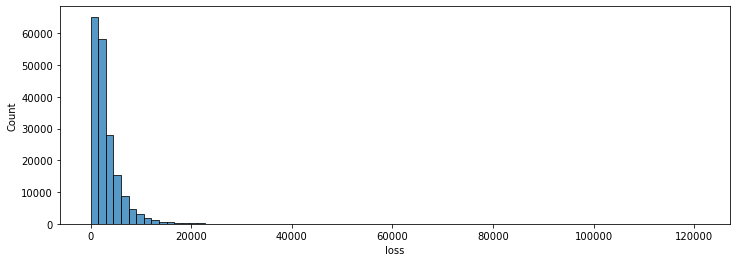

In [13]:
plt.figure(figsize=(12,4))
sns.histplot(train['loss'], bins=80)

In [27]:
train['loss'].describe()

count    188318.000000
mean       3037.337686
std        2904.086186
min           0.670000
25%        1204.460000
50%        2115.570000
75%        3864.045000
max      121012.250000
Name: loss, dtype: float64

##### Most target values seem to lie between 0 and 25000. Let's take a look at values above 25000. 

In [26]:
print('loss > 25000', train[train['loss'] > 25000].shape[0])
print('loss > 40000', train[train['loss'] > 40000].shape[0])
print('loss > 60000', train[train['loss'] > 60000].shape[0])

loss > 25000 159
loss > 40000 23
loss > 60000 6


##### Since the loss mean is around 3000 with std around 3000, values > 40,000 are extreme values and will affect the model fit.
##### If we remove the 23 + 6 extreme loss values, it accounts for less than 1% of our data and will allow our model to fit better. 

<AxesSubplot:xlabel='loss', ylabel='Count'>

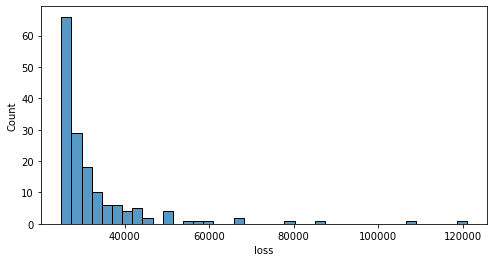

In [33]:
plt.figure(figsize =(8,4))
sns.histplot(train[train['loss'] > 25000]['loss'], bins = 40)

<AxesSubplot:xlabel='loss', ylabel='Count'>

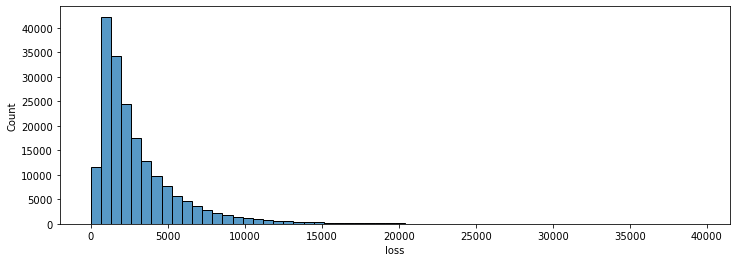

In [34]:
# Let's see how our plot looks if we remove the 29 values 
plt.figure(figsize =(12,4))
sns.histplot(train[train['loss'] < 40000]['loss'], bins = 60)

##### The loss distribution is skewed, let's perform log transformation to see if log-loss follows normal distribution

C:\Users\sayli\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sayli\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'log loss')

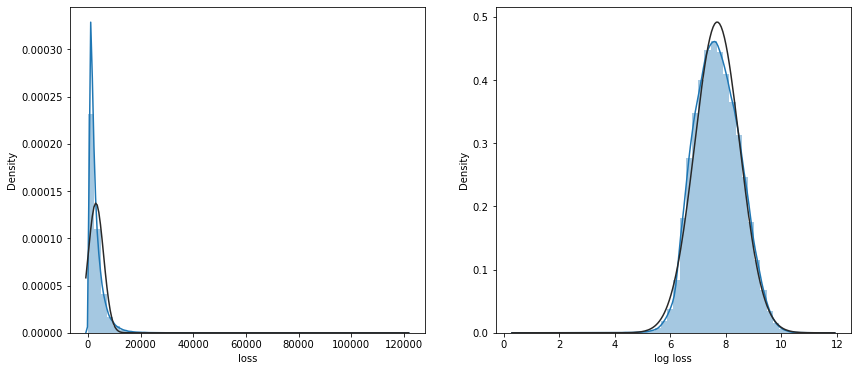

In [31]:
from scipy.stats import norm
figure, ax = plt.subplots(nrows = 1 , ncols=2, figsize=(14,6))
sns.distplot(train['loss'], fit = norm, ax=ax[0])
sns.distplot(np.log1p(train['loss']), fit = norm, ax = ax[1])
ax[1].set_xlabel('log loss')

##### log-loss is approximately normally distributed

# Exploring continuous variables 

In [35]:
train[num_features].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cont1,188318.0,0.493861,0.187640,0.000016,0.346090,0.475784,0.623912,0.984975
cont2,188318.0,0.507188,0.207202,0.001149,0.358319,0.555782,0.681761,0.862654
cont3,188318.0,0.498918,0.202105,0.002634,0.336963,0.527991,0.634224,0.944251
cont4,188318.0,0.491812,0.211292,0.176921,0.327354,0.452887,0.652072,0.954297
cont5,188318.0,0.487428,0.209027,0.281143,0.281143,0.422268,0.643315,0.983674
cont6,188318.0,0.490945,0.205273,0.012683,0.336105,0.440945,0.655021,0.997162
cont7,188318.0,0.484970,0.178450,0.069503,0.350175,0.438285,0.591045,1.000000
cont8,188318.0,0.486437,0.199370,0.236880,0.312800,0.441060,0.623580,0.980200
cont9,188318.0,0.485506,0.181660,0.000080,0.358970,0.441450,0.566820,0.995400
cont10,188318.0,0.498066,0.185877,0.000000,0.364580,0.461190,0.614590,0.994980


##### All continuous variables have similar range, means and standard errors. There does not seem to be a need for standardization. 

<AxesSubplot:>

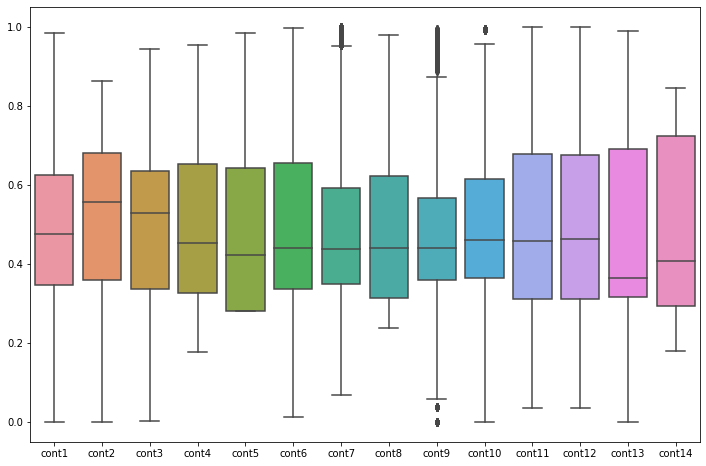

In [54]:
plt.figure(figsize = (12,8))
sns.boxplot(data = train[num_features])

##### Lets see how continuous features are related to the target variable

<AxesSubplot:>

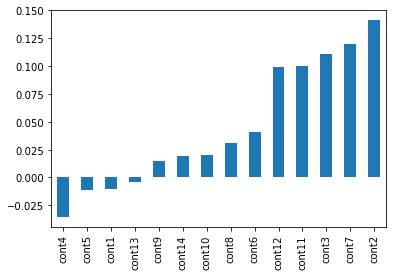

In [48]:
train[num_features].corr(method='pearson')['loss'][:-1].sort_values().plot(kind='bar')

In [50]:
#num_features.append('loss')

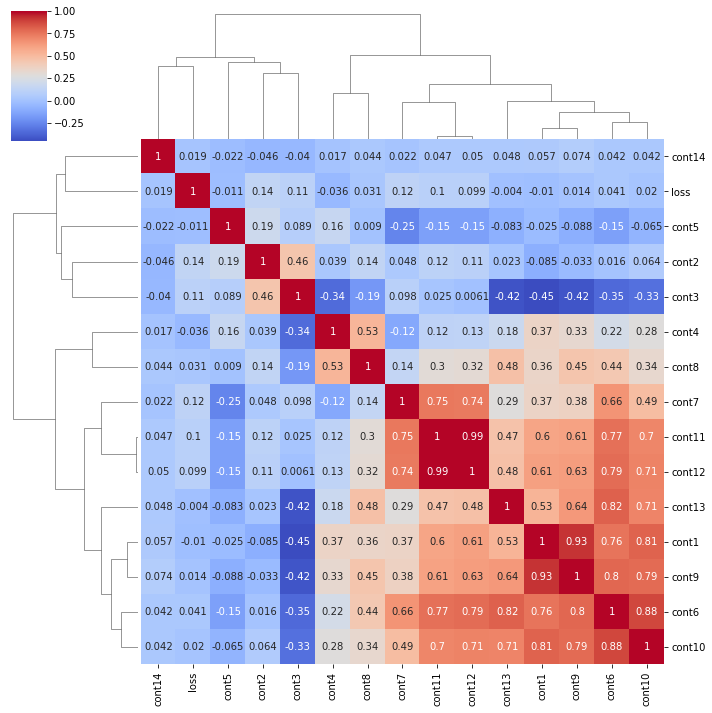

In [51]:
sns.clustermap(train[num_features].corr(method='pearson'), cmap='coolwarm',annot =True)
#pearson benchmarks linear relationships

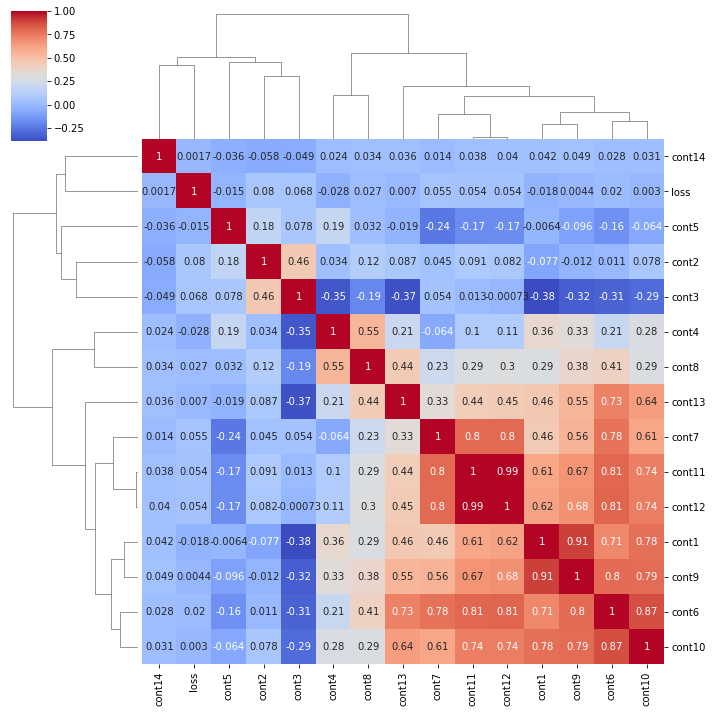

In [41]:
sns.clustermap(train[num_features].corr(method='spearman'), cmap='coolwarm',annot =True)
#spearman benchmarks monotonic relationships

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

df = train[num_features]

Xdf = add_constant(df)
vif = pd.Series([variance_inflation_factor(Xdf.values, i) for i in range(Xdf.shape[1])], index=Xdf.columns)
vif.sort_values()

cont14     1.013544
loss       1.041824
cont5      1.198738
cont2      1.550715
cont4      2.007197
cont8      2.099065
cont3      2.598697
cont7      4.698554
cont13     6.881089
cont10     7.023172
cont9     10.909572
cont1     12.580443
cont6     22.208463
const     58.144816
cont11    95.291153
cont12    98.147111
dtype: float64

##### Is there a multicollinearity issue? 
cont11 and cont12 have almost perfect linear relationship -- need to remove one of the two vars 
cont6 is highly correlated with a lot of variables and has a high vif -- we will drop this and see if it helps improve results
cont1 and cont9 are highly correlated and have slightly high vif values -- we can drop cont1 and see if it helps improve results
##### we can safely drop cont12, cont6, cont1

<AxesSubplot:xlabel='cont11', ylabel='cont12'>

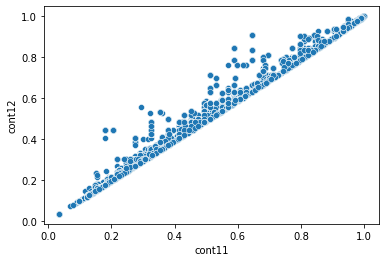

In [53]:
sns.scatterplot(data = train, x='cont11',y='cont12')

<AxesSubplot:xlabel='cont1', ylabel='cont9'>

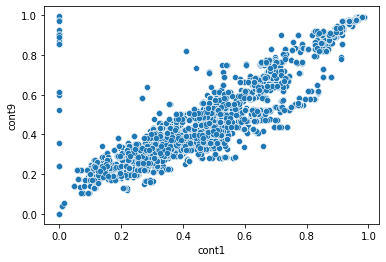

In [54]:
sns.scatterplot(data = train, x='cont1',y='cont9')

<AxesSubplot:xlabel='cont6', ylabel='cont10'>

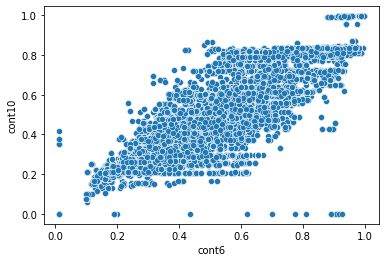

In [55]:
sns.scatterplot(data = train, x='cont6',y='cont10')

##### How are continuous variables related to the target variable?
cont 2 seems to be taking values like 0.2, 0.25, 0.3.. 

In [56]:
train['logloss'] = np.log1p(train['loss'])

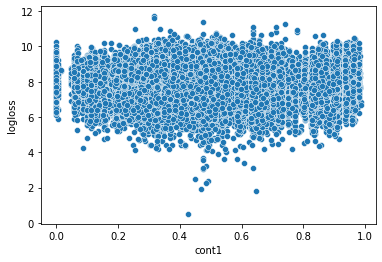

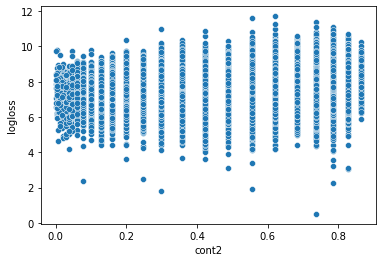

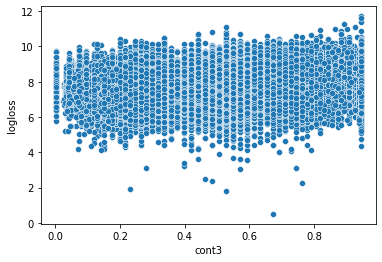

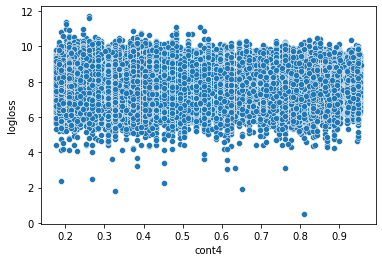

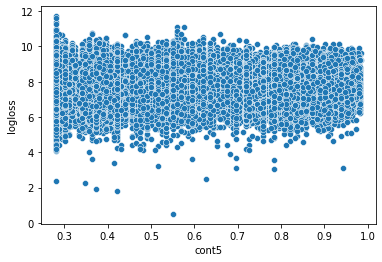

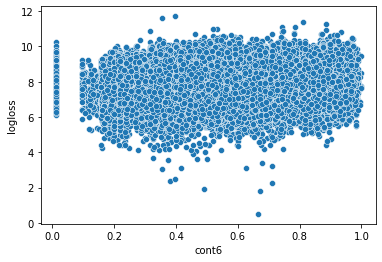

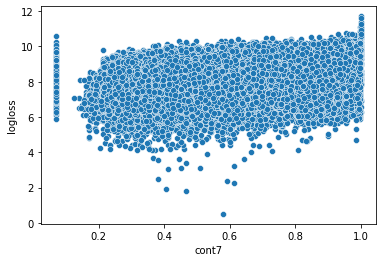

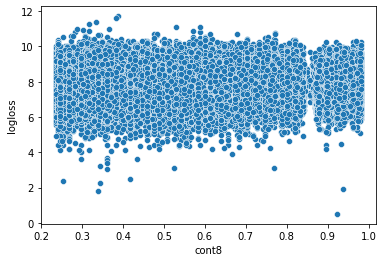

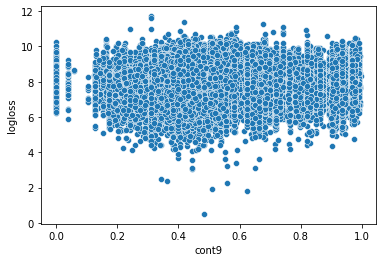

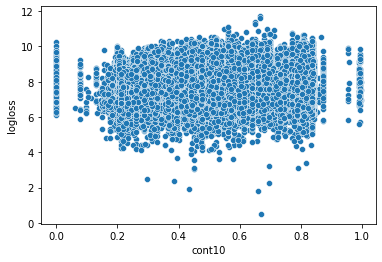

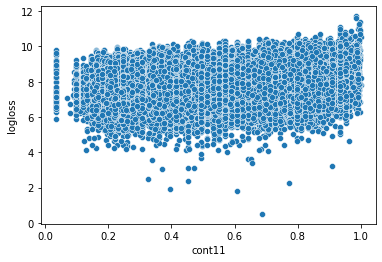

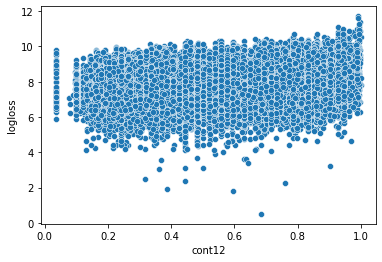

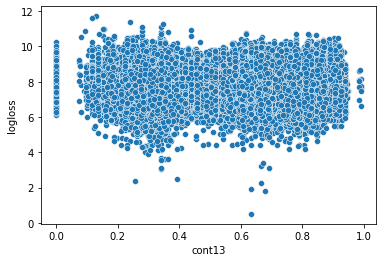

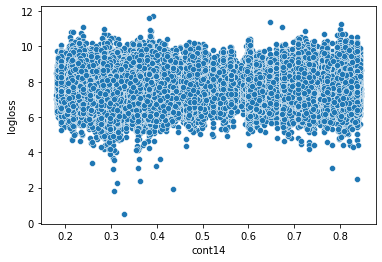

In [77]:
#num_features.remove('loss')

for num in num_features:
    sns.scatterplot(data = train, x=num, y='logloss')
    plt.show()
    

# Exploring Categorical variables

In [64]:
nlevels = train[cat_features].apply(pd.Series.nunique)

##### How many categories does each of the categorical variable have? 

In [65]:
nlevels.value_counts().sort_index()

2      72
3       4
4      12
5       3
7       4
8       3
9       1
11      1
13      1
15      1
16      2
17      2
19      2
20      2
23      1
51      1
61      1
84      1
131     1
326     1
dtype: int64

<AxesSubplot:>

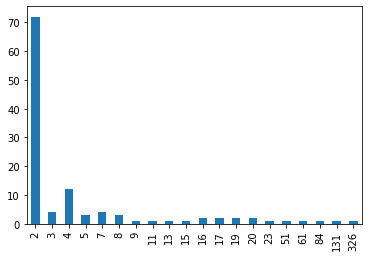

In [66]:
nlevels.value_counts().sort_index().plot(kind='bar')

##### list of variables with more than 10 categories each. 

In [68]:
#list of variables with more than 10 categories each. 
nlevels[(nlevels > 9)].sort_values()

cat108     11
cat103     13
cat100     15
cat111     16
cat99      16
cat106     17
cat104     17
cat101     19
cat114     19
cat105     20
cat107     20
cat115     23
cat112     51
cat113     61
cat109     84
cat110    131
cat116    326
dtype: int64

##### There are 18 variables with more than 10 categories each. There are 5 variables with more than 50 categories each, one of these has 326 categories. Let's take a look at these variables. 

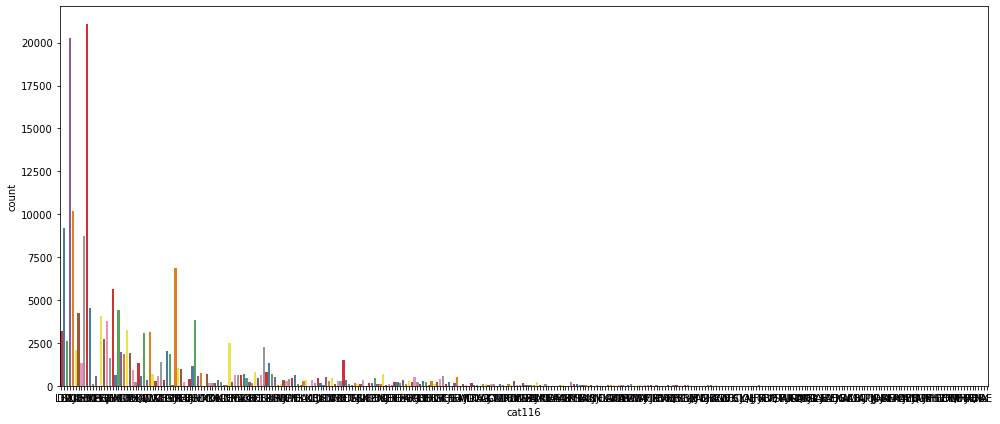

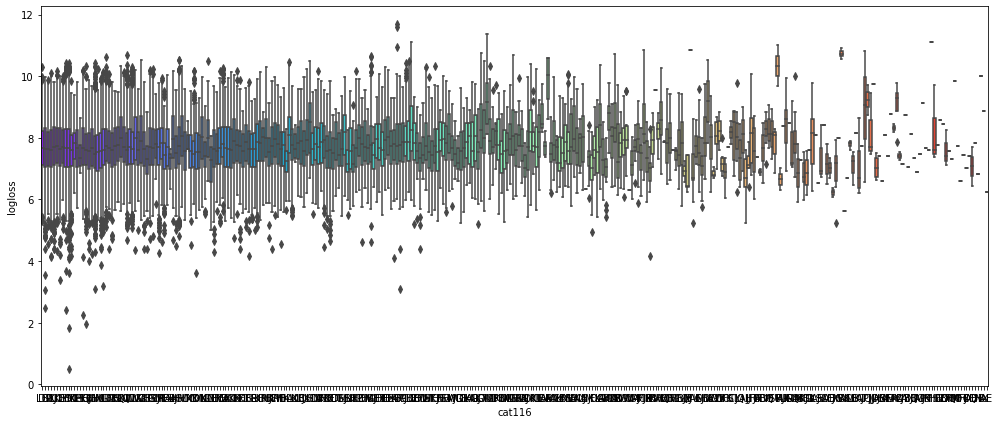

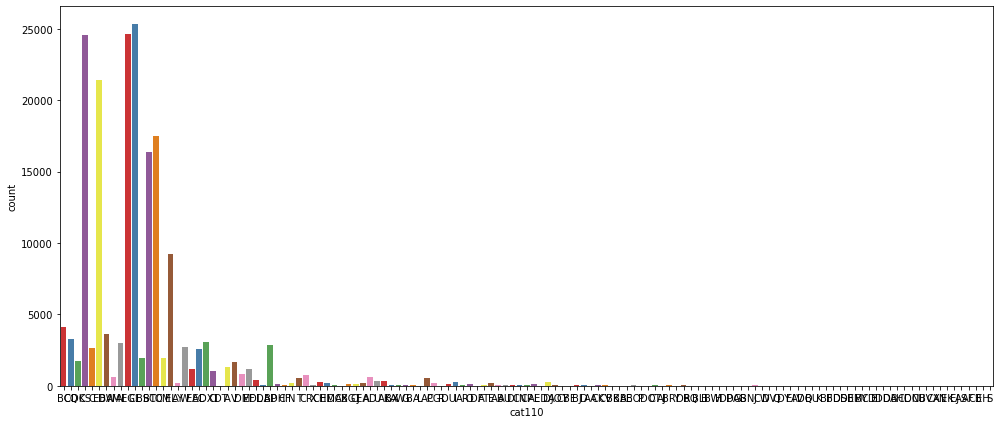

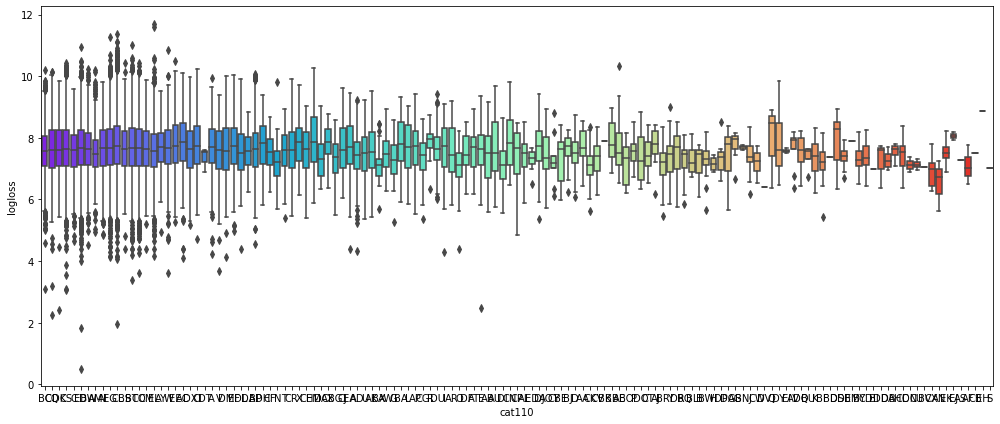

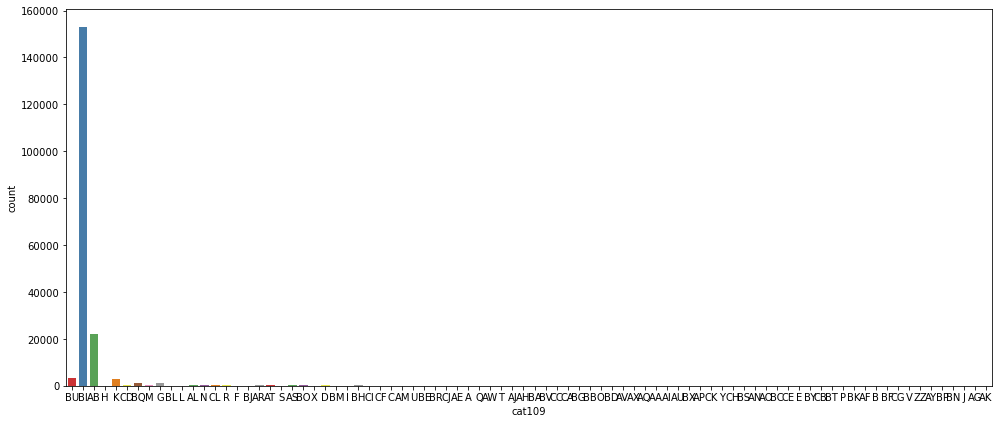

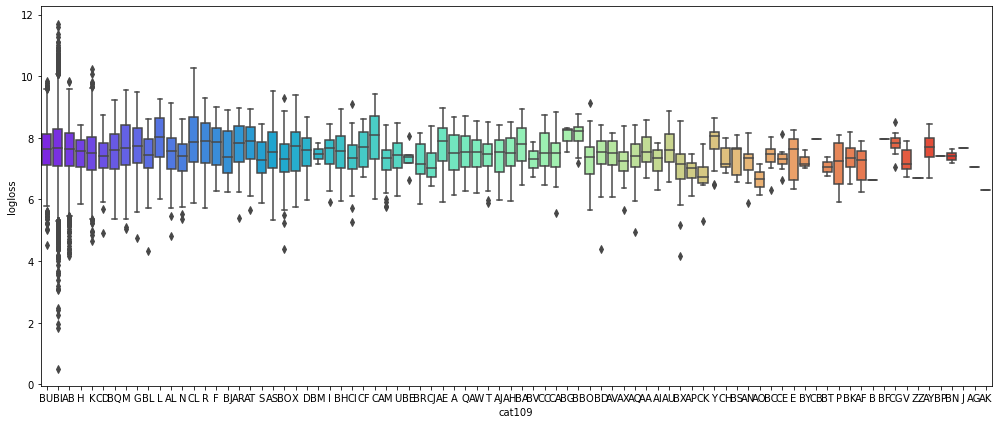

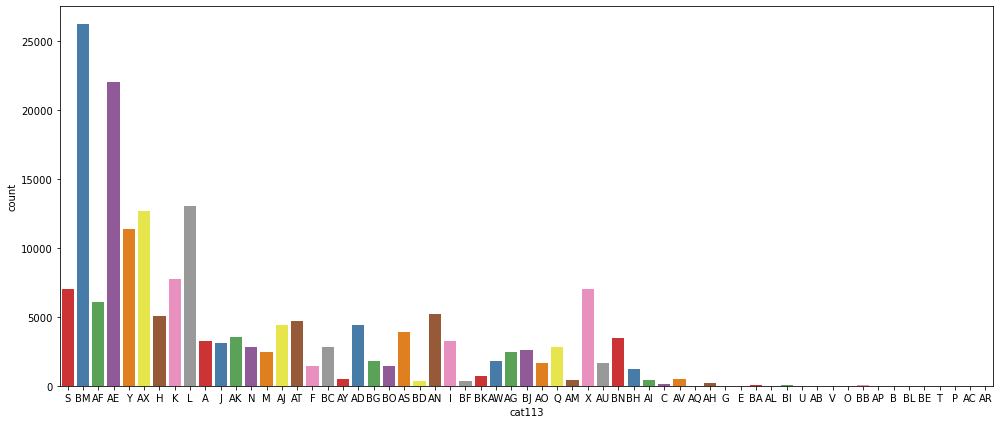

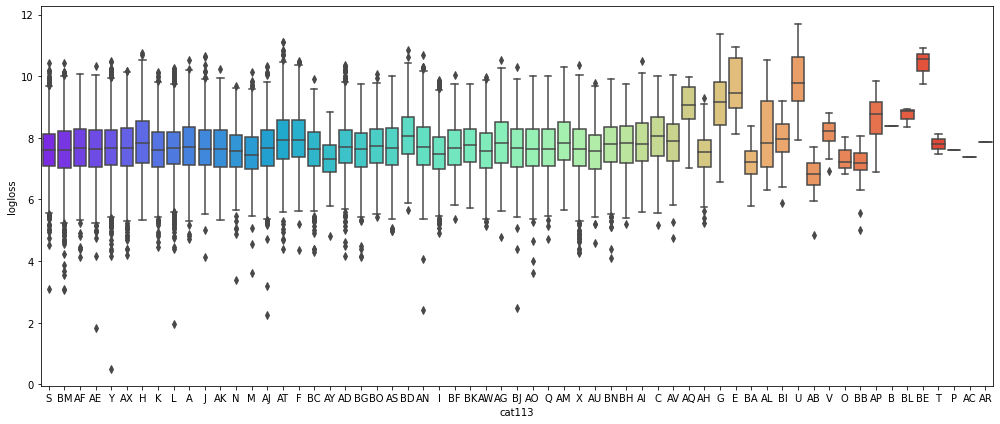

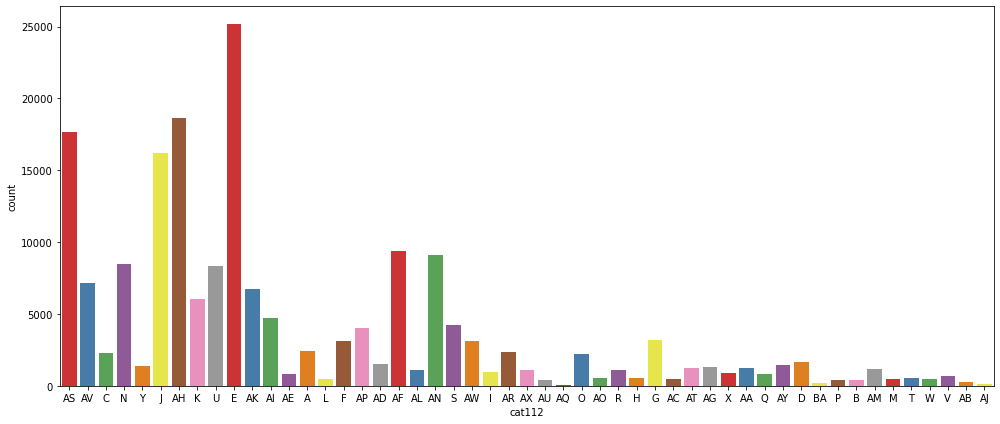

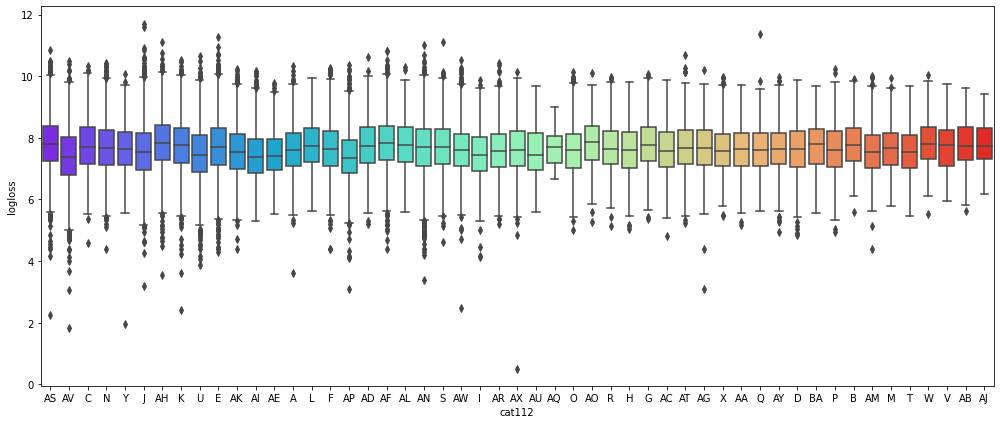

In [72]:
#plots for 5 variables with more than 50 categories 
for cat in nlevels[nlevels>50].sort_values(ascending=False).index:
    plt.figure(figsize=(14,6))
    sns.countplot(x = cat, data = train, palette = 'Set1')
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(14,6))
    sns.boxplot(data = train, x = cat, y = 'logloss',palette='rainbow')
    plt.tight_layout()
    plt.show()

##### For variables with more than 50 categories
cat116 seems to explain some variability in the target variable 
cat110, cat109 and cat113 can be engineered to have fewer categories 
cat112 seems to have similar target values across categories 

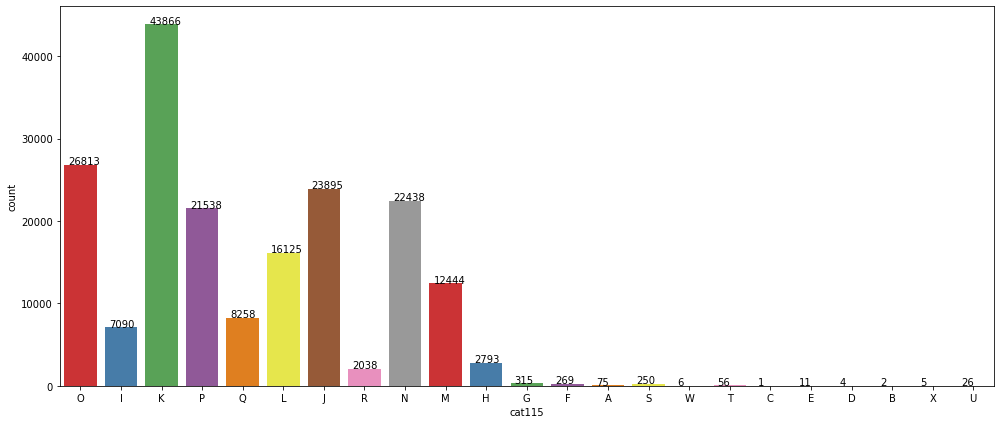

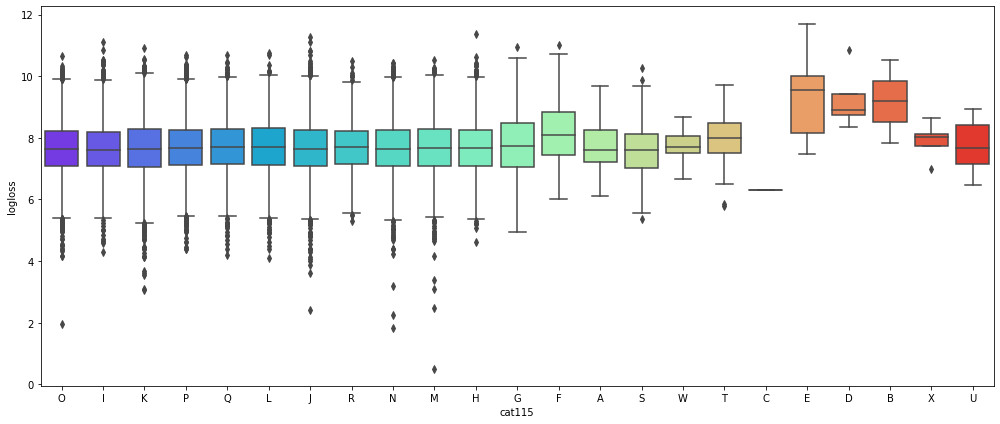

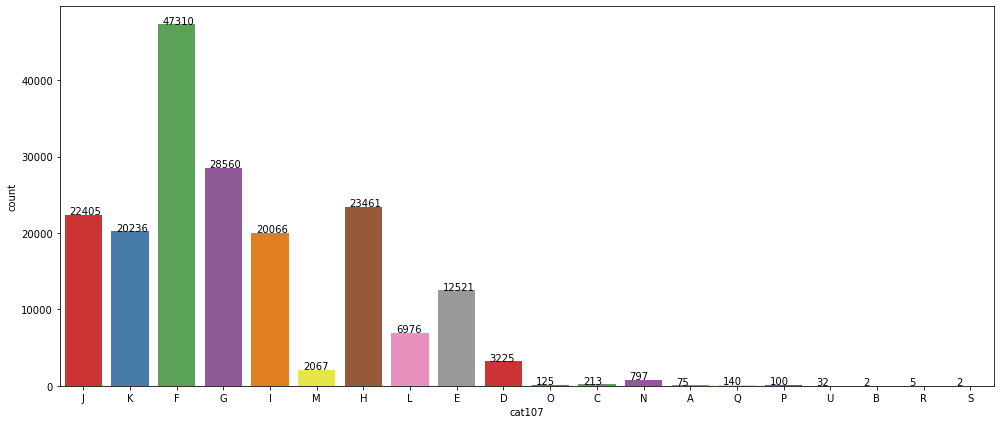

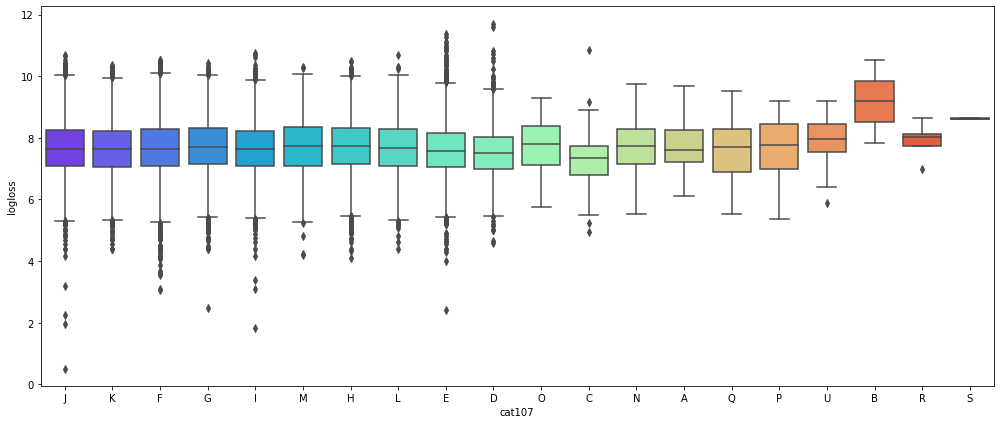

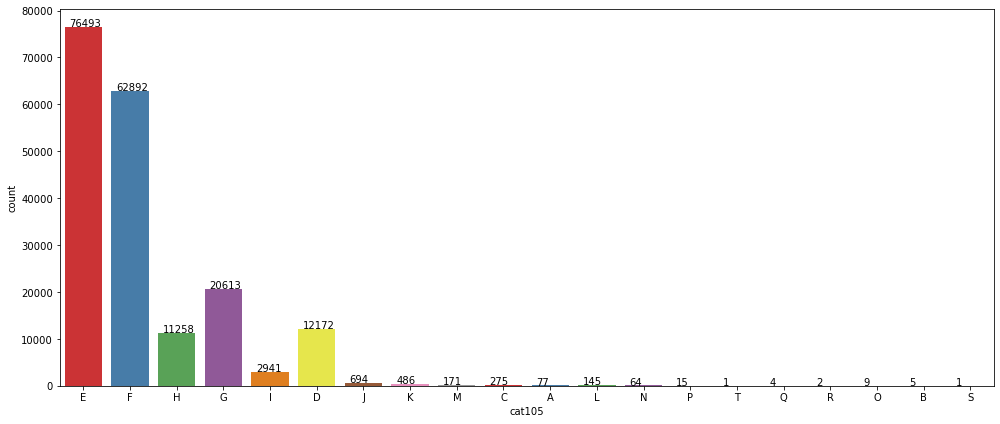

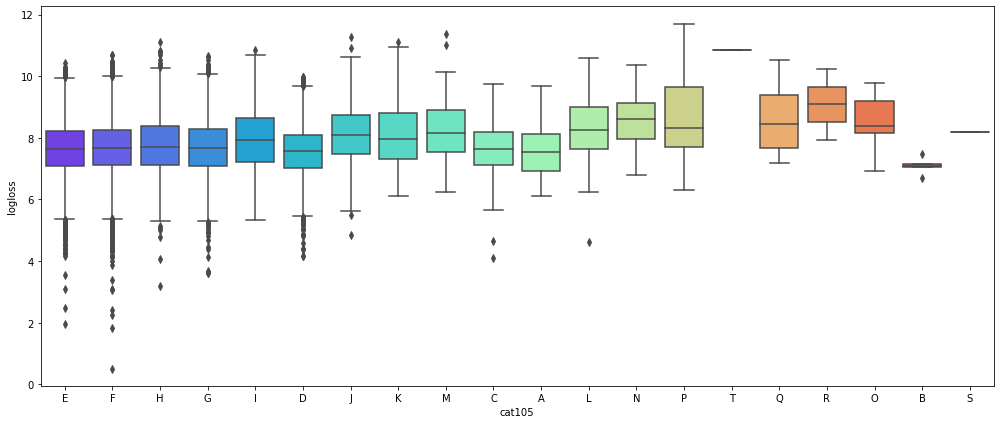

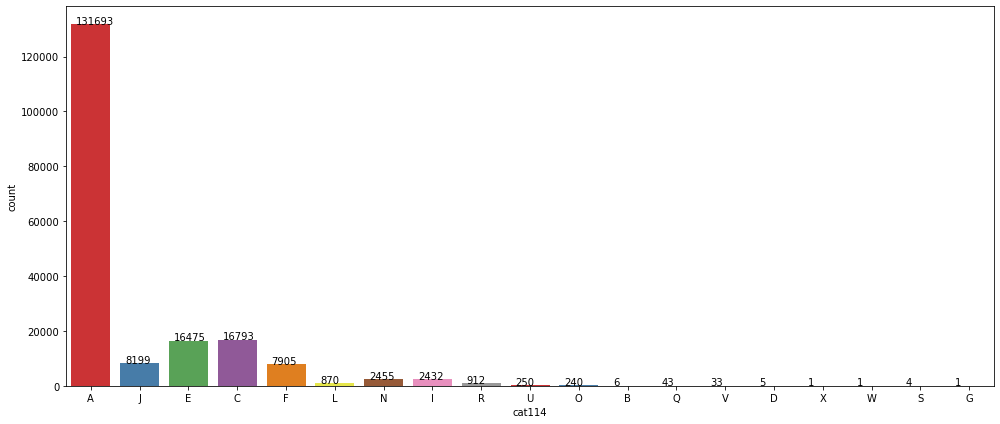

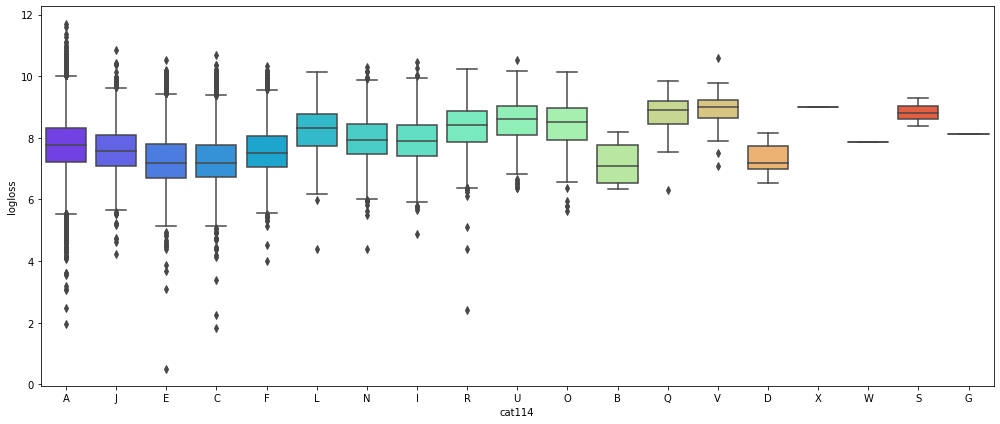

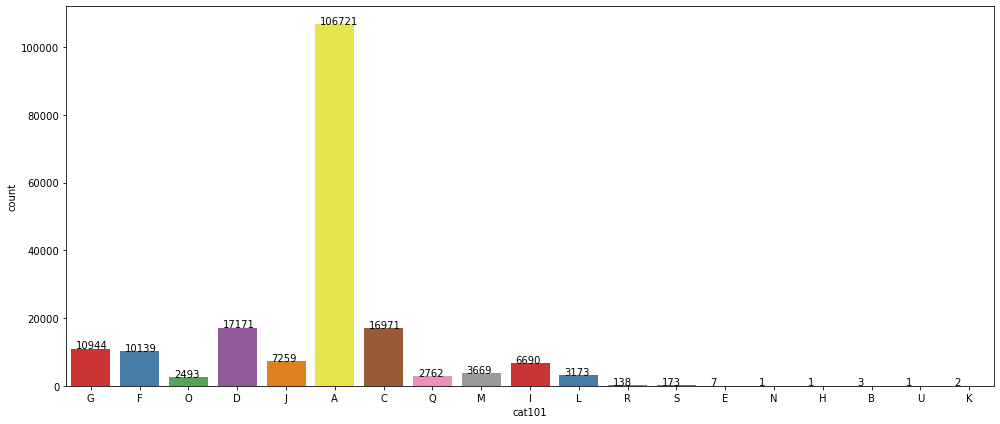

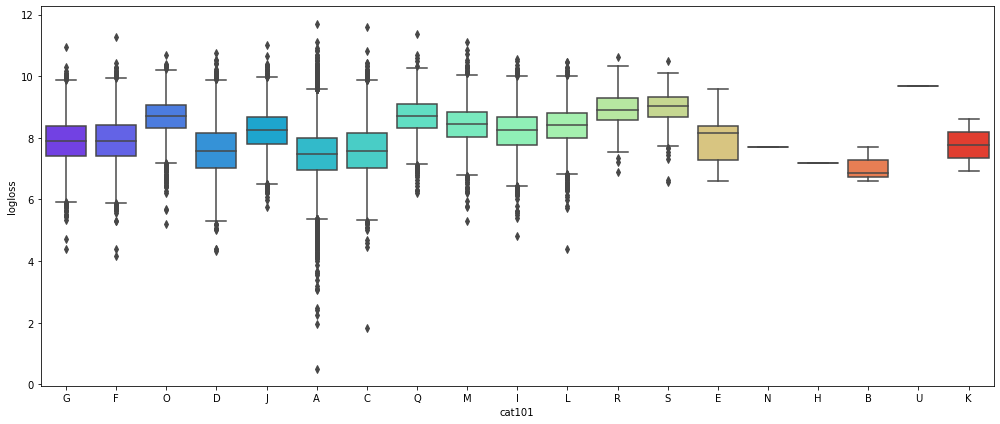

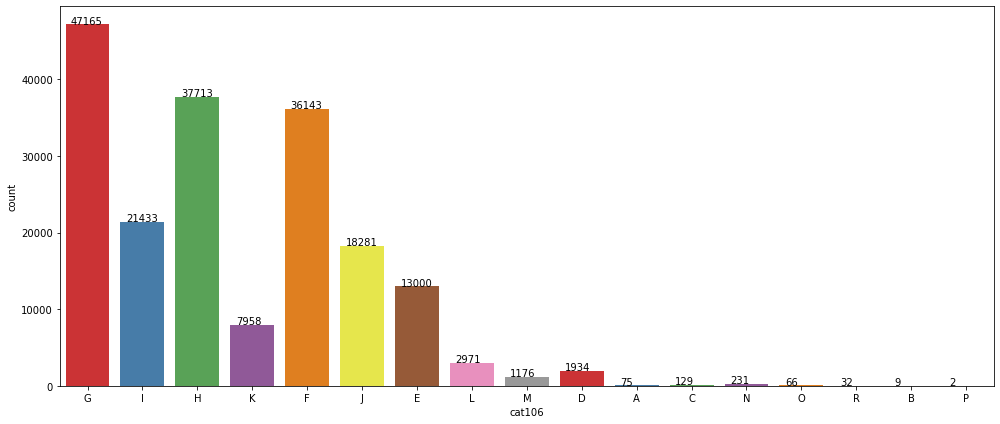

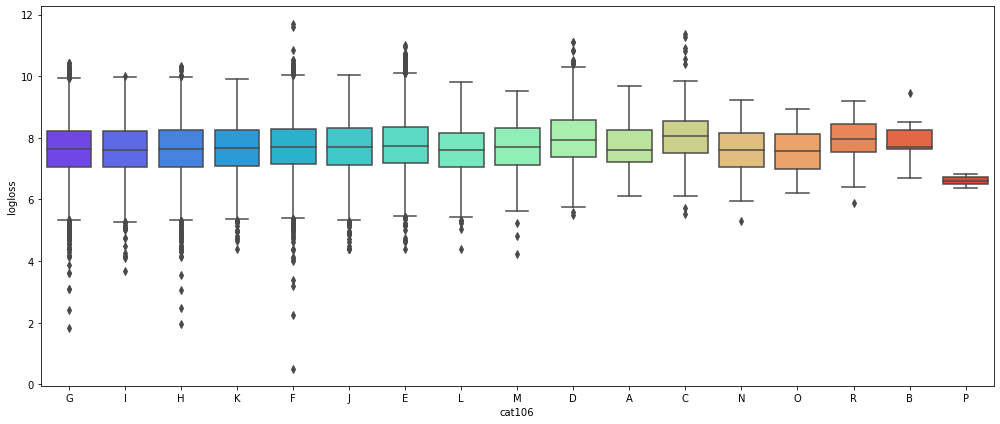

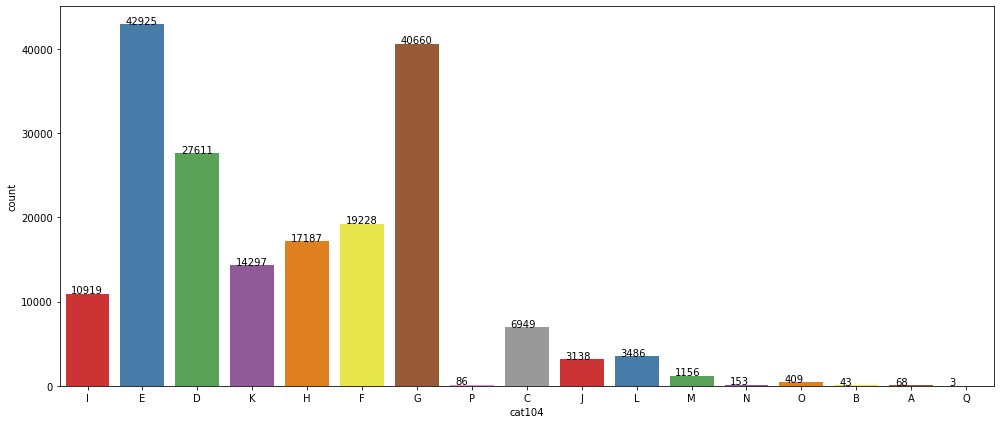

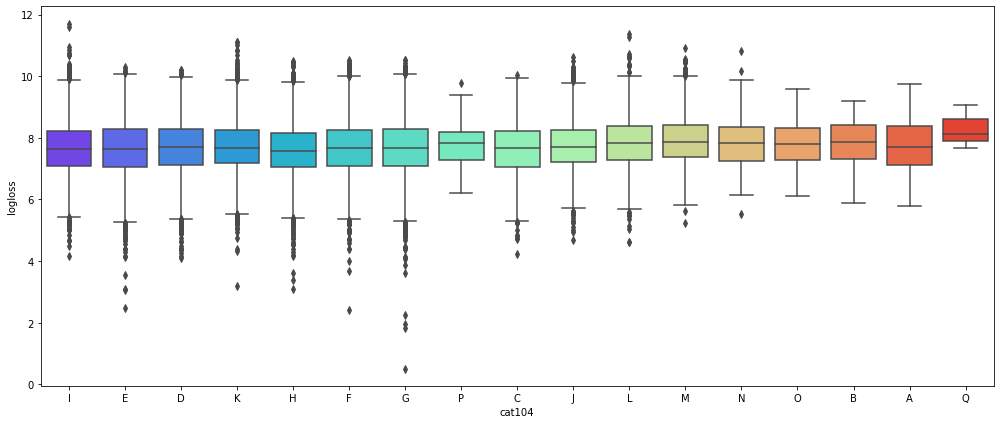

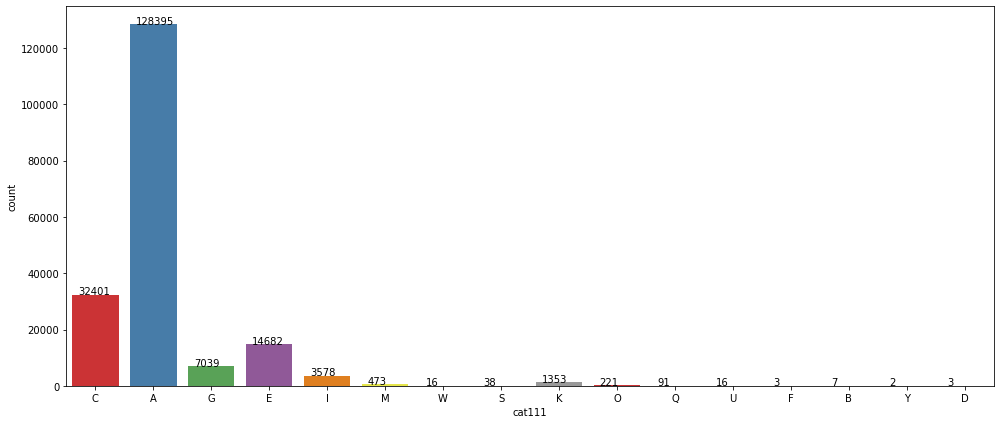

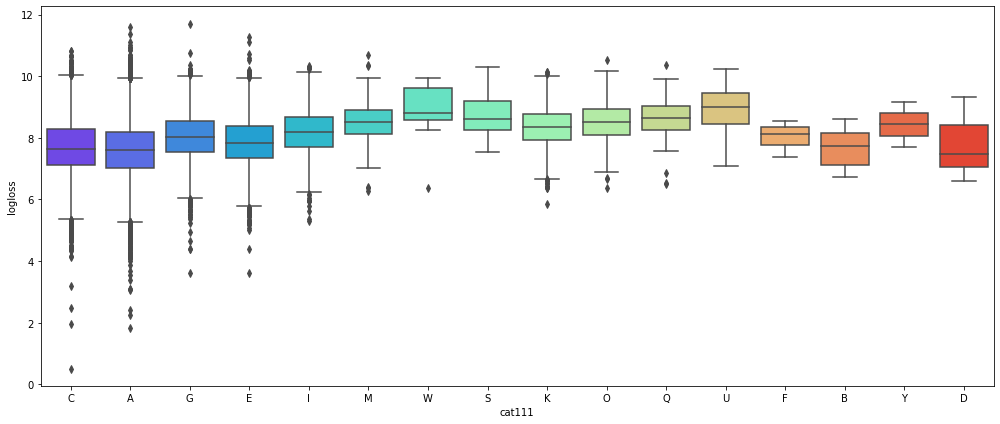

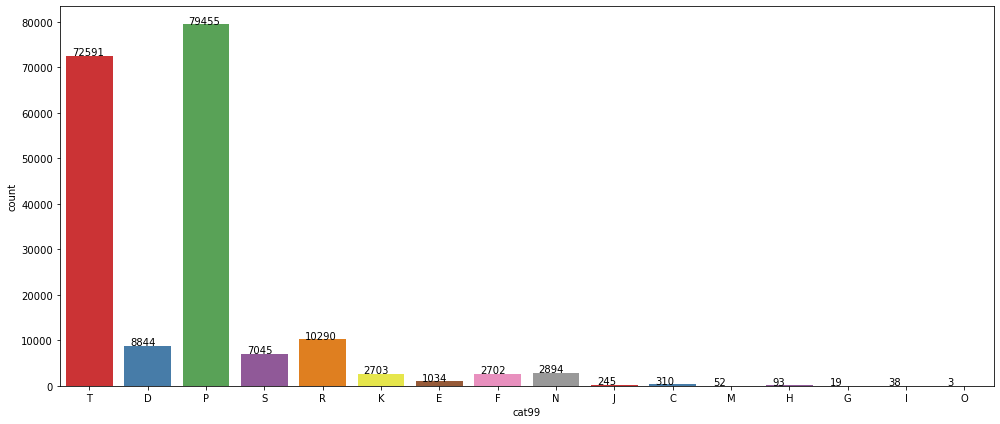

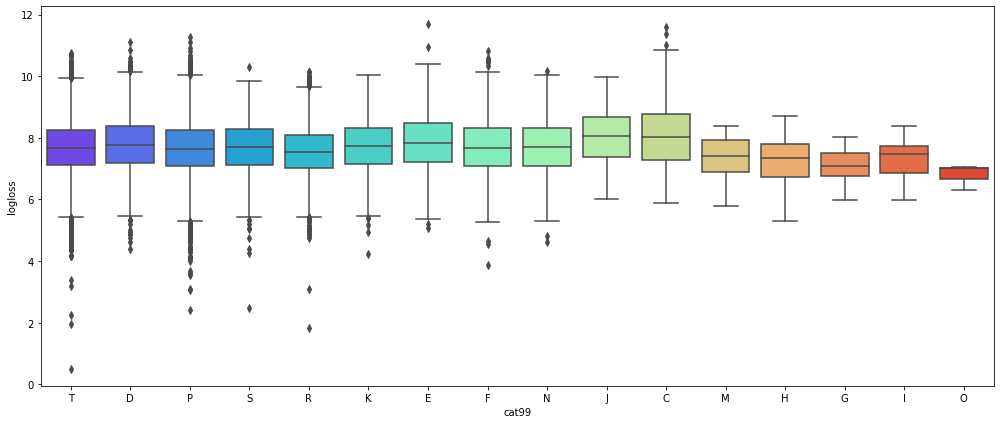

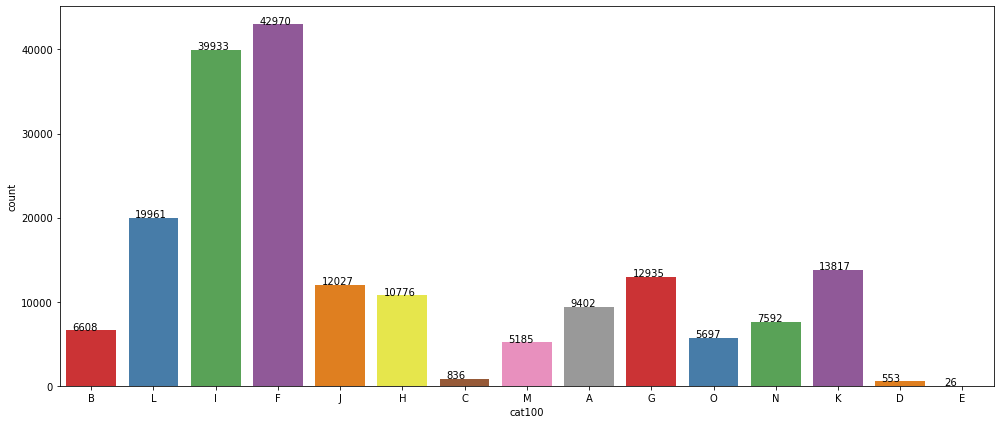

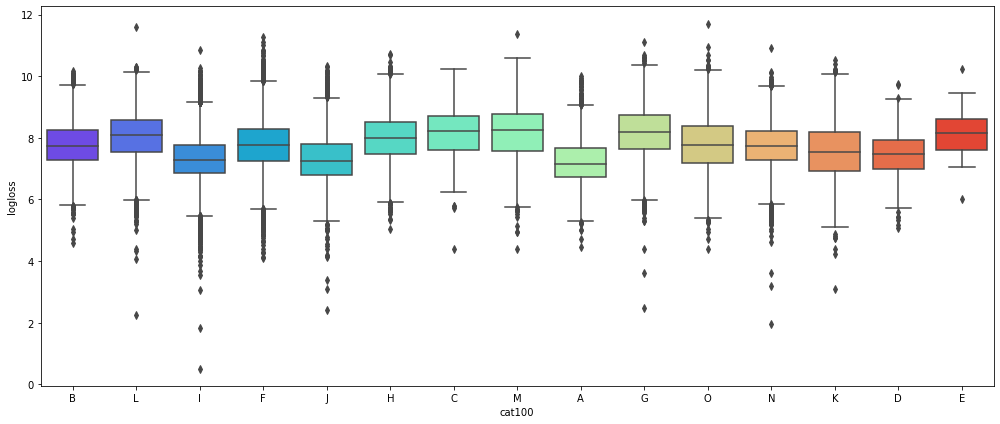

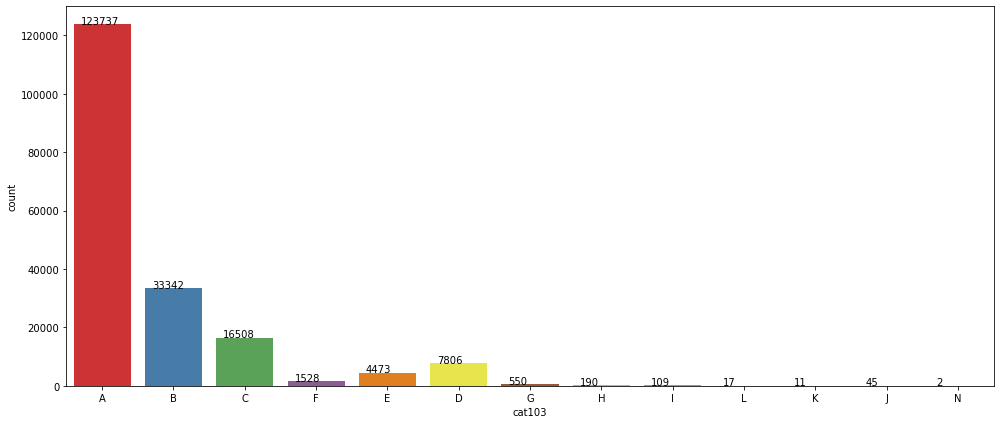

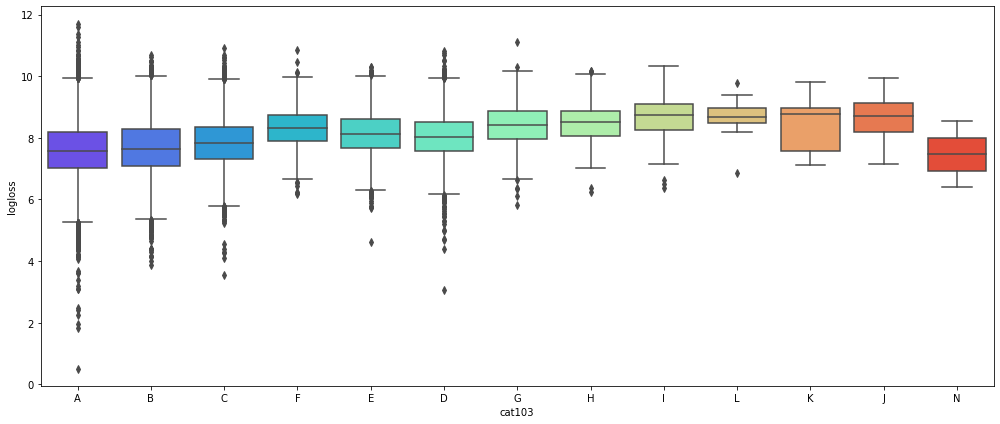

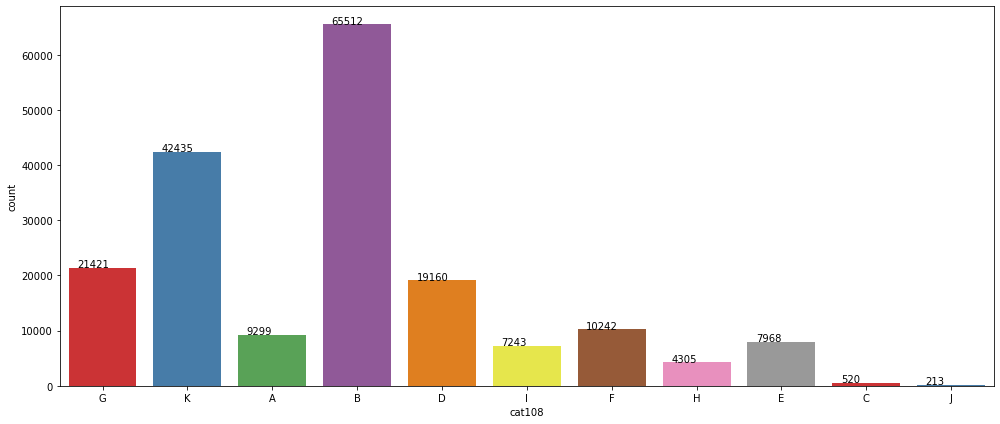

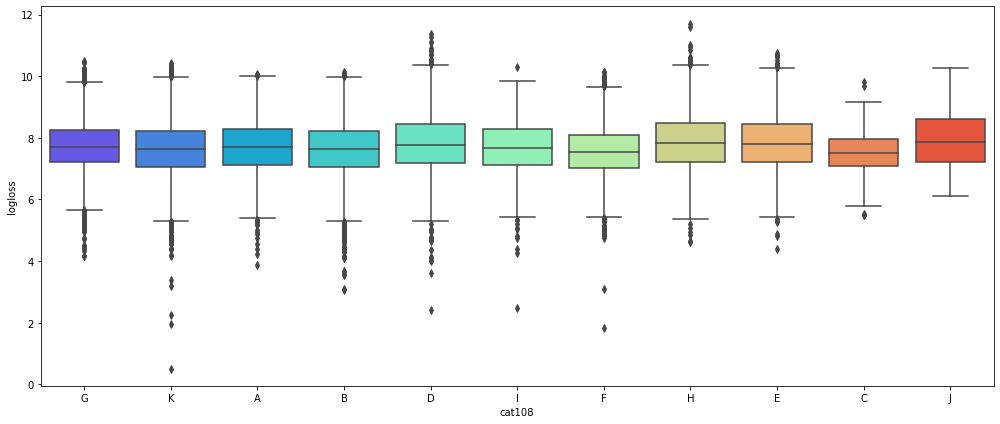

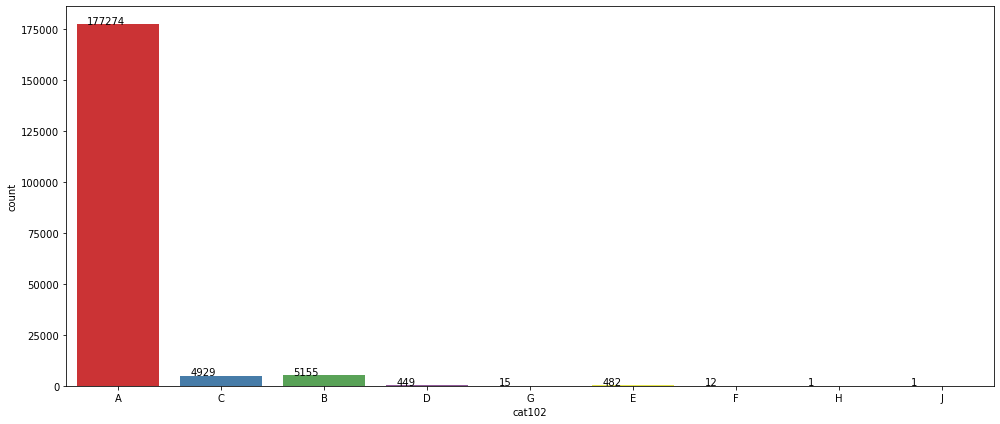

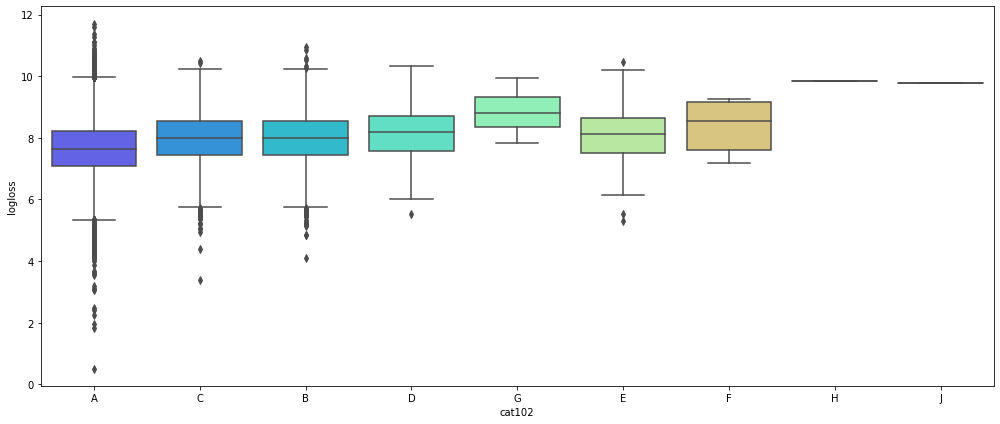

In [73]:
for cat in nlevels[(nlevels > 8) & (nlevels <50)].sort_values(ascending=False).index:
    plt.figure(figsize=(14,6))
    ax = sns.countplot(x = cat, data = train, palette = 'Set1')
    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(14,6))
    sns.boxplot(data = train, x = cat, y = 'logloss',palette='rainbow')
    plt.tight_layout()
    plt.show()
    

##### For variables with categories between 9 to 50
cat114, cat101, cat111, cat100, and cat102 maybe helpful in explaining variance in the target variable. 

<ipython-input-144-70c751af9eba>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrows=1,ncols=2, figsize = (12,4))


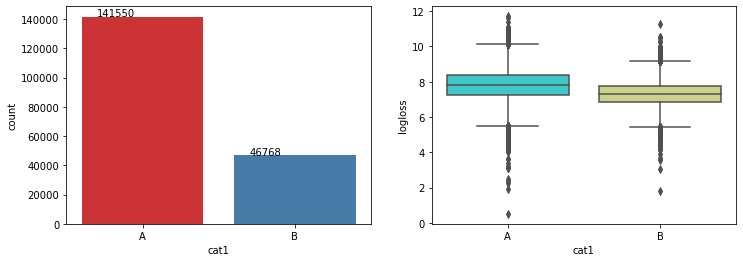

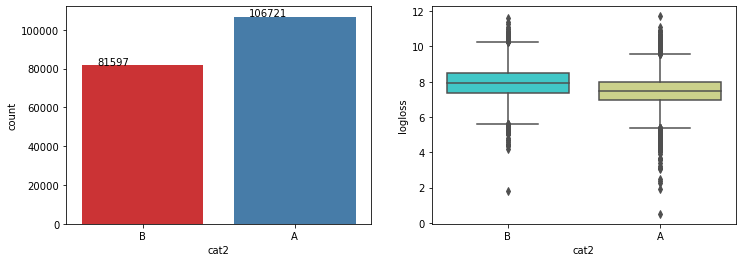

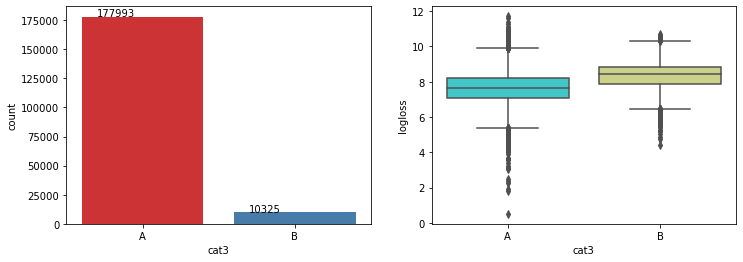

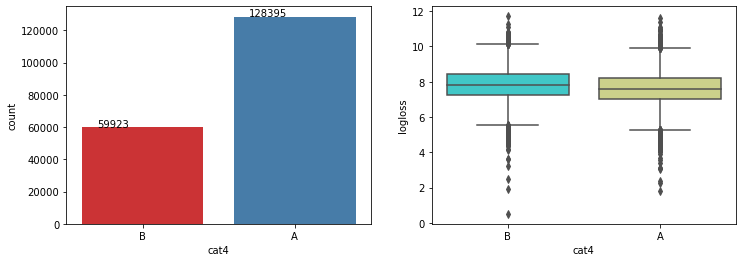

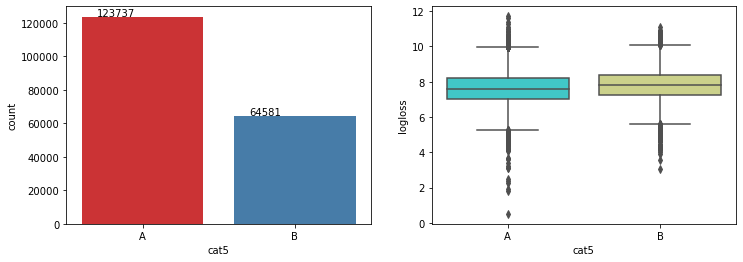

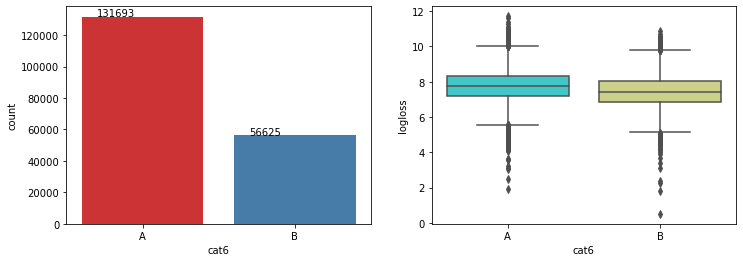

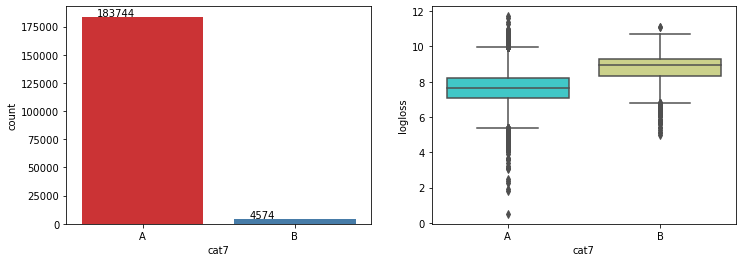

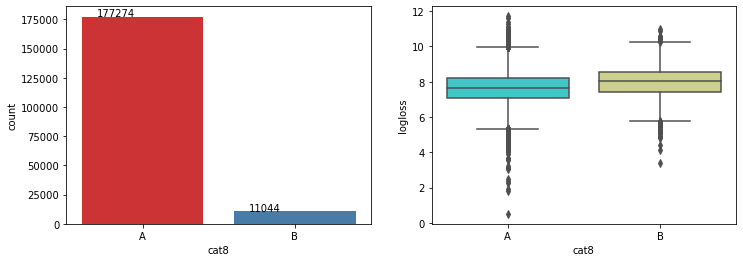

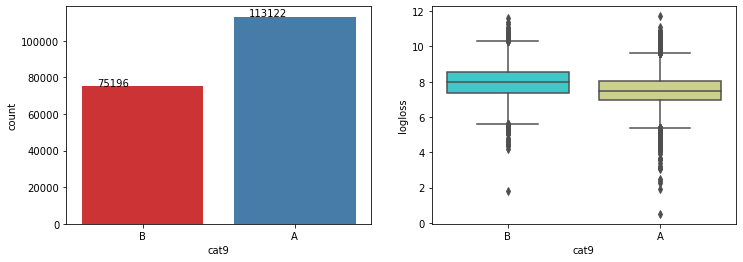

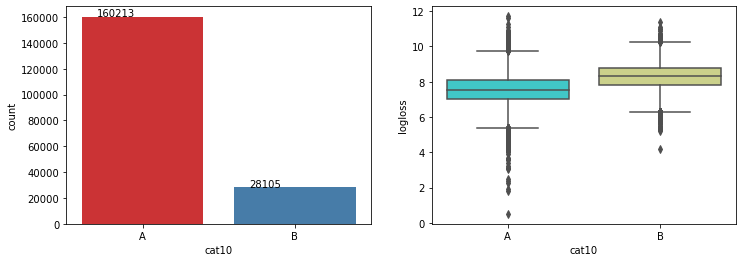

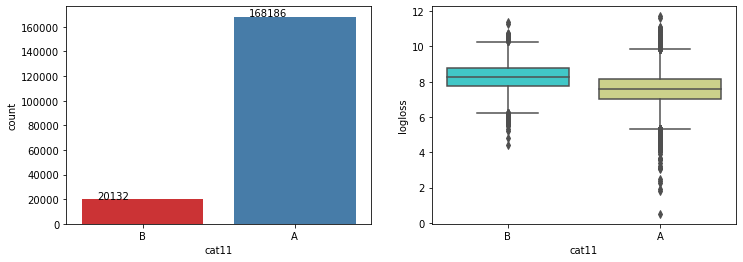

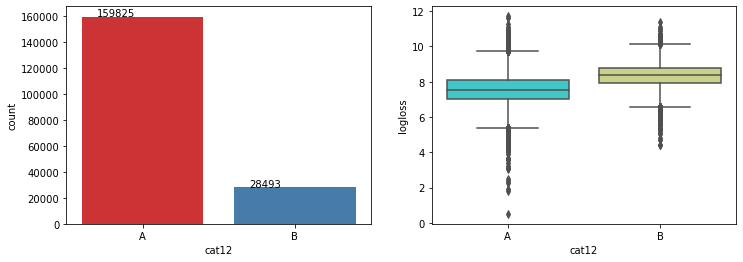

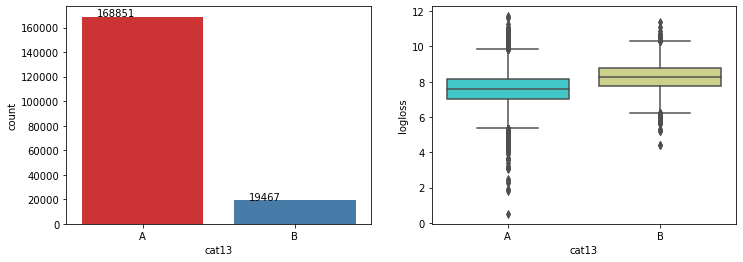

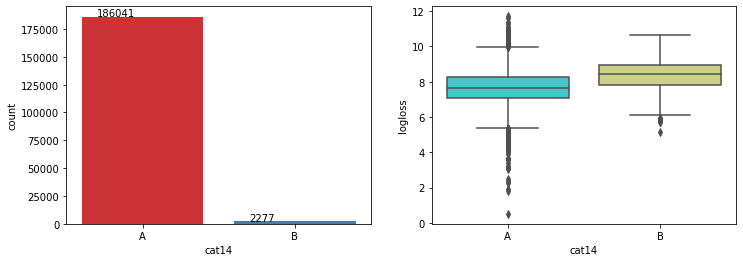

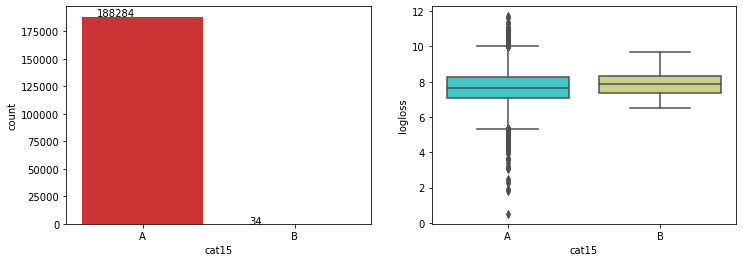

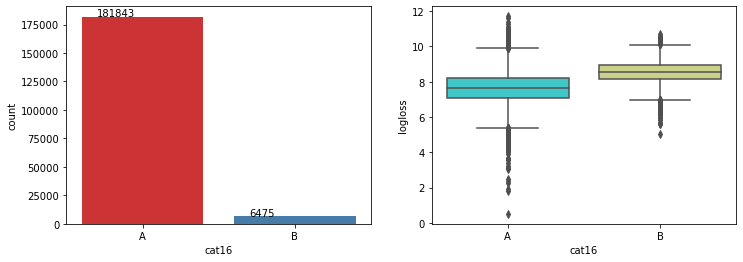

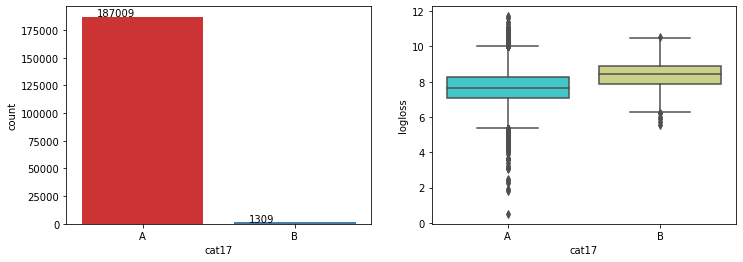

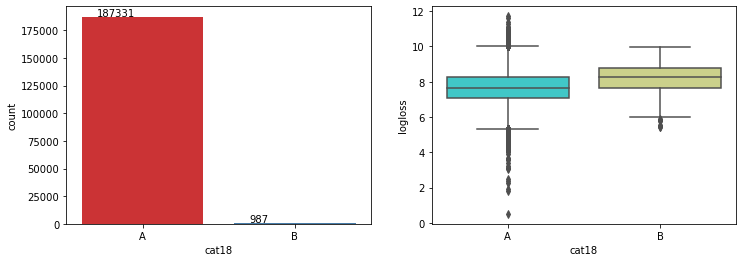

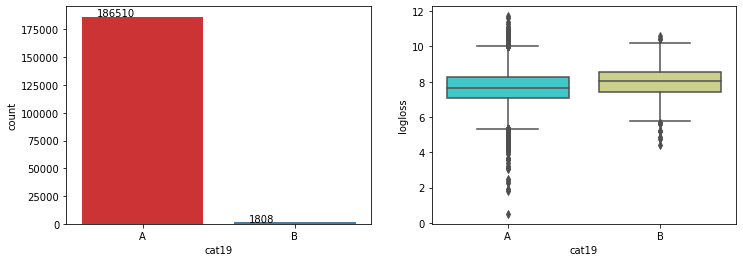

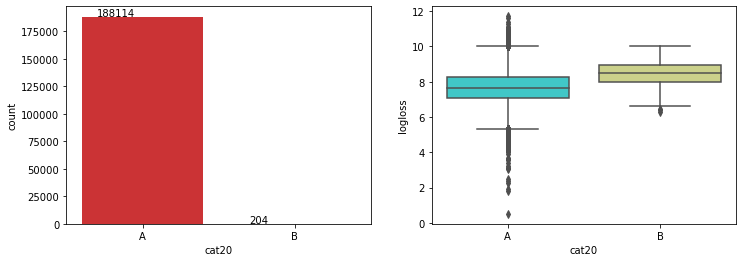

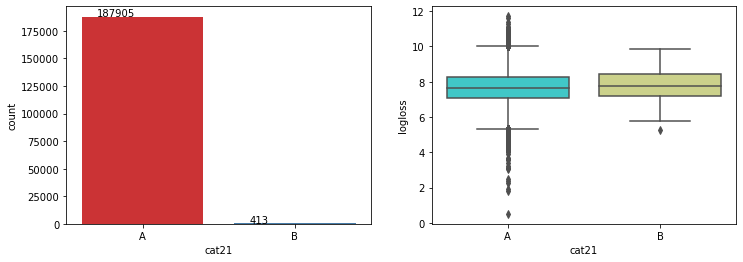

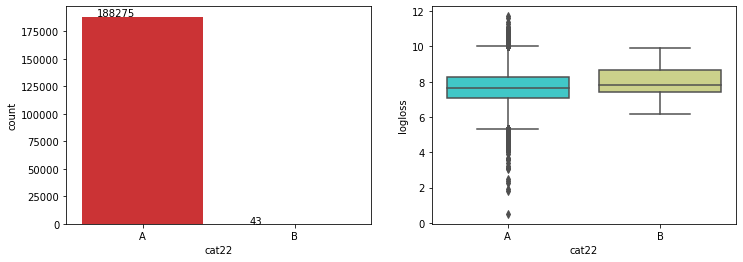

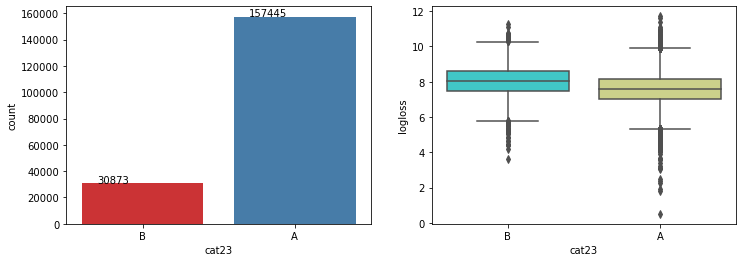

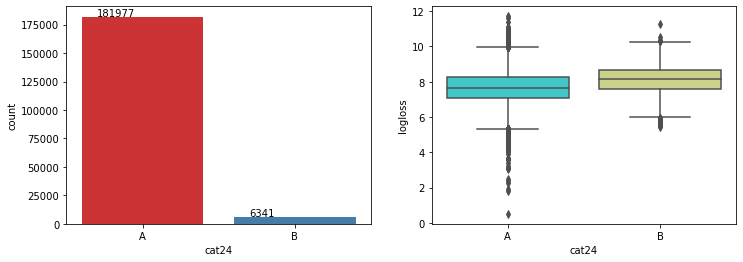

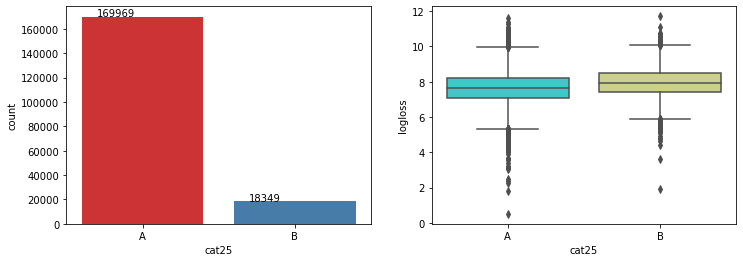

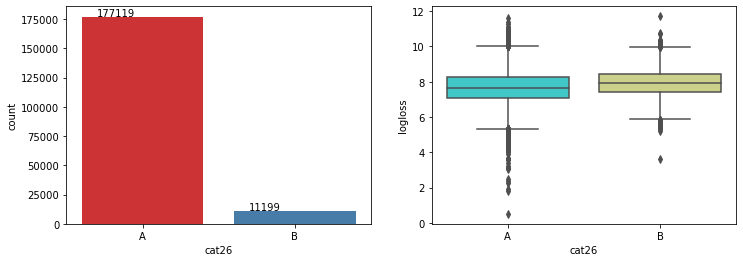

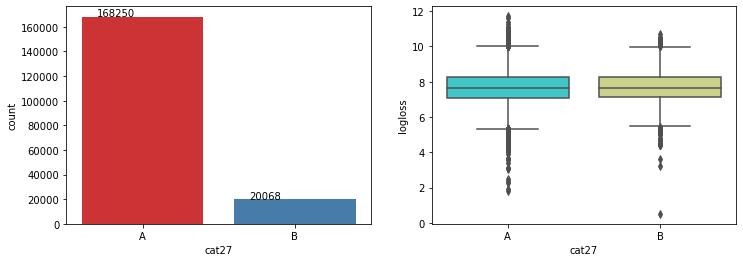

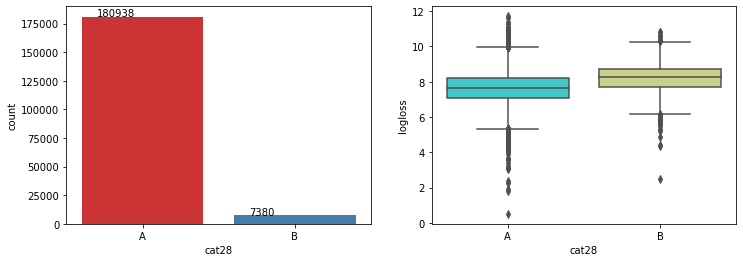

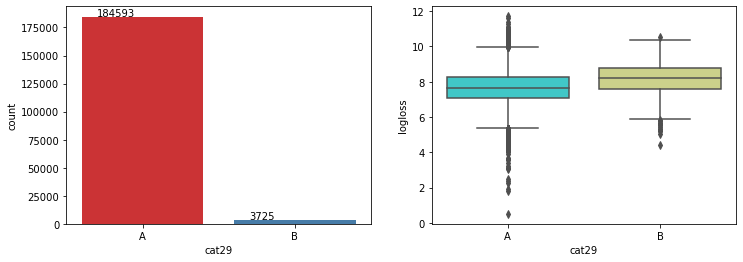

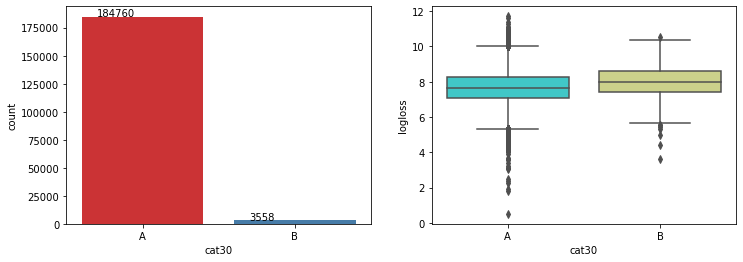

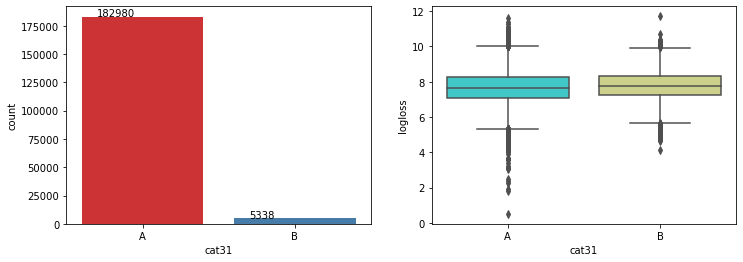

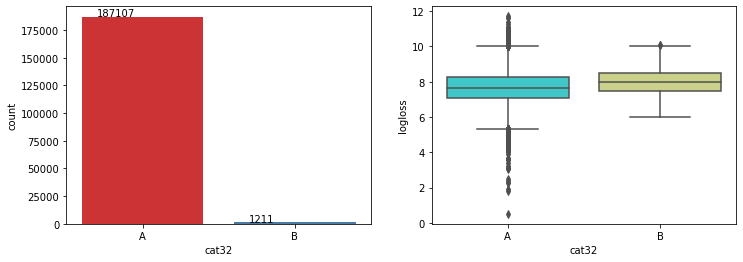

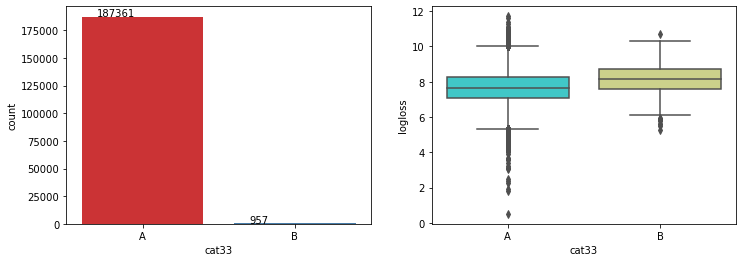

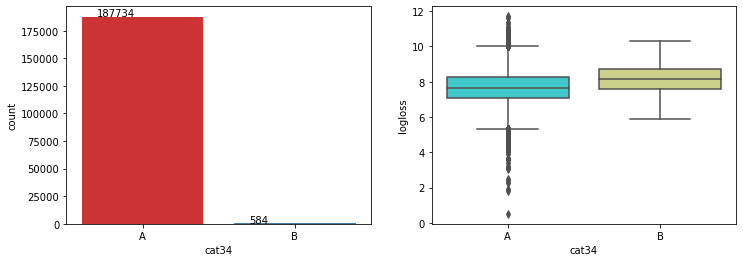

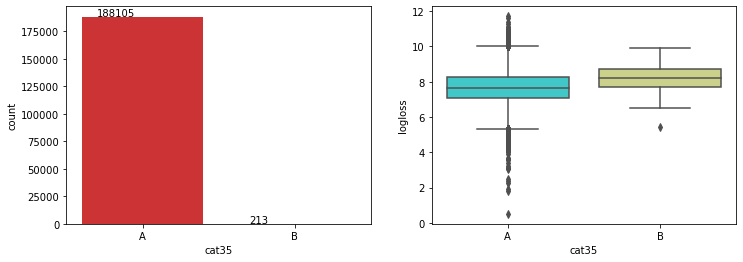

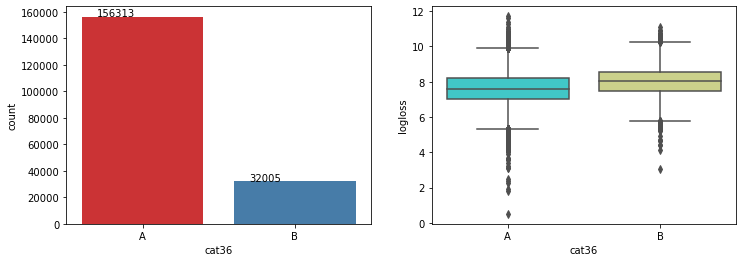

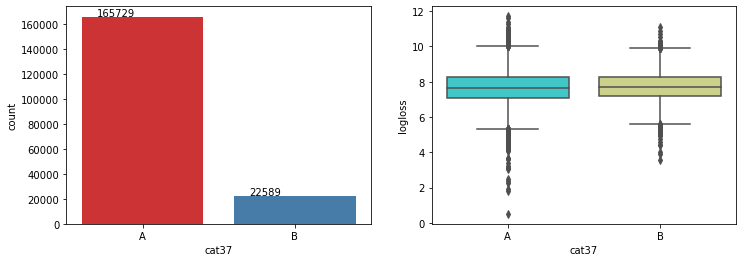

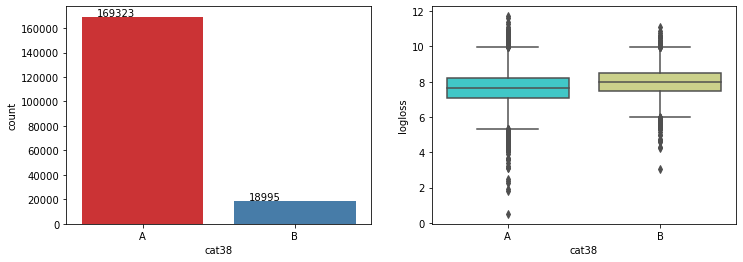

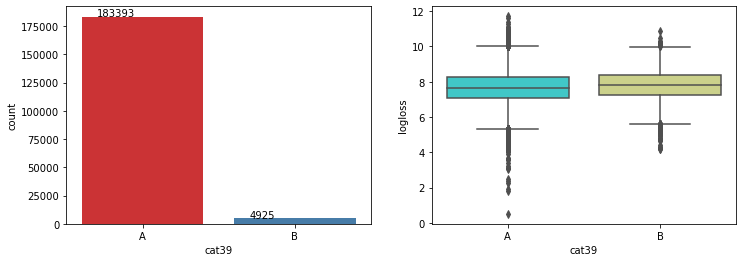

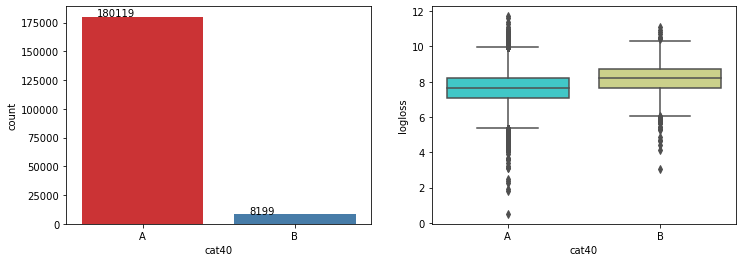

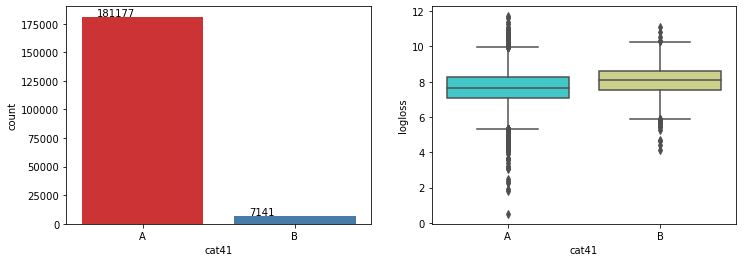

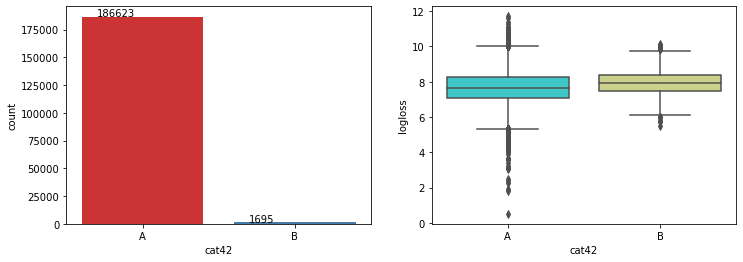

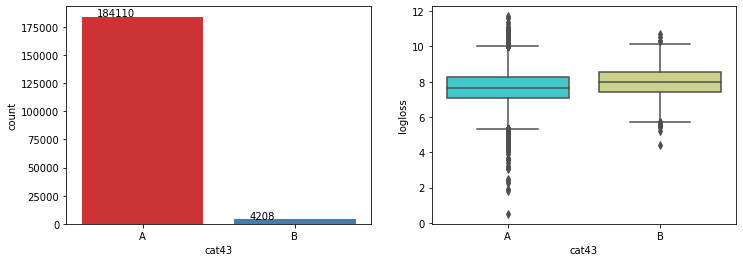

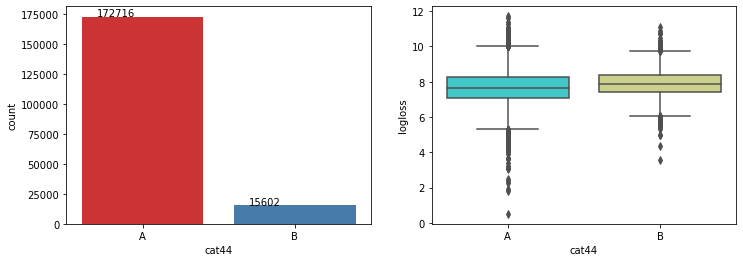

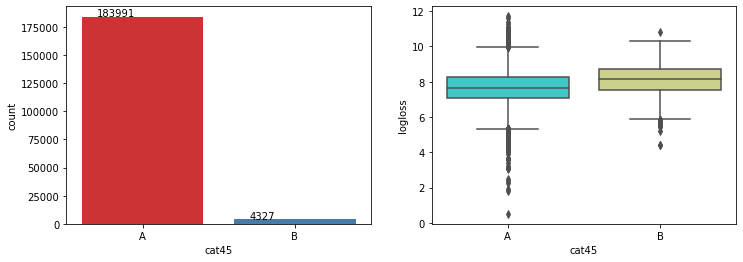

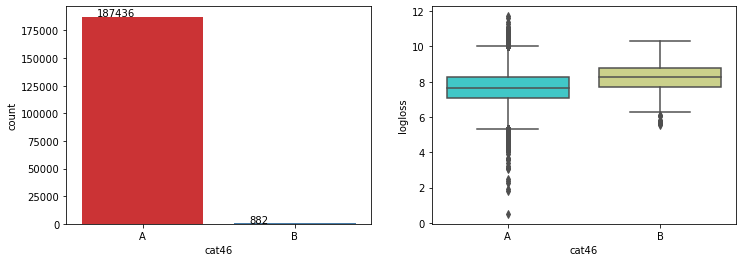

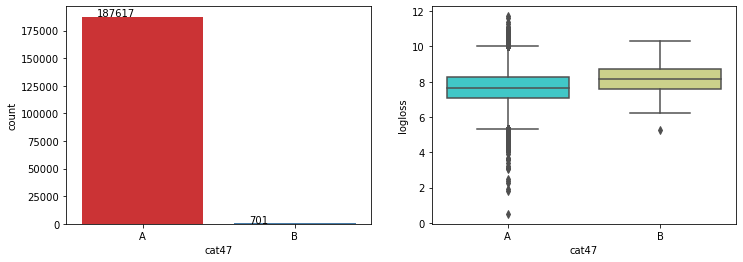

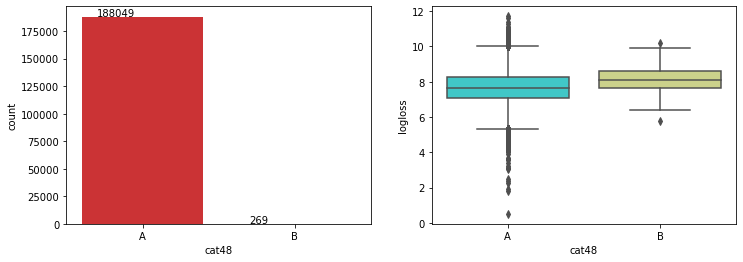

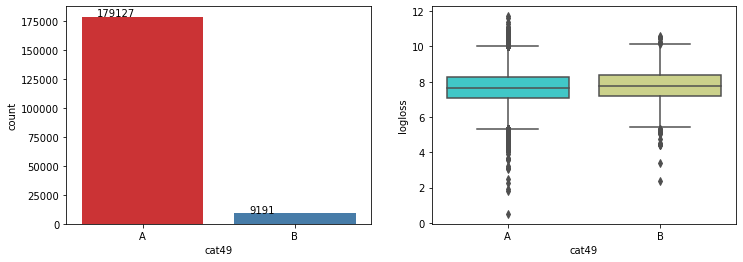

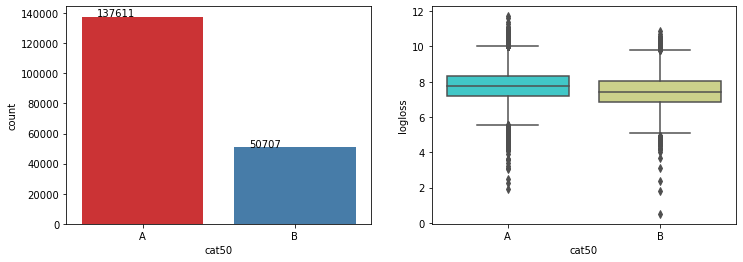

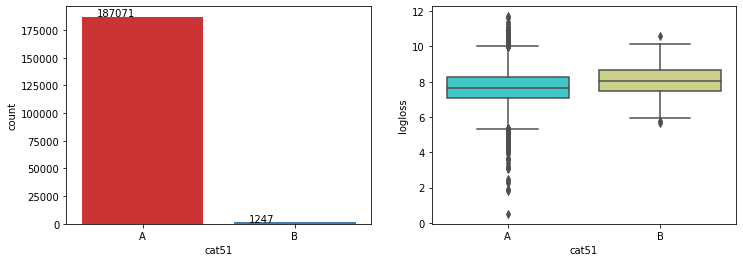

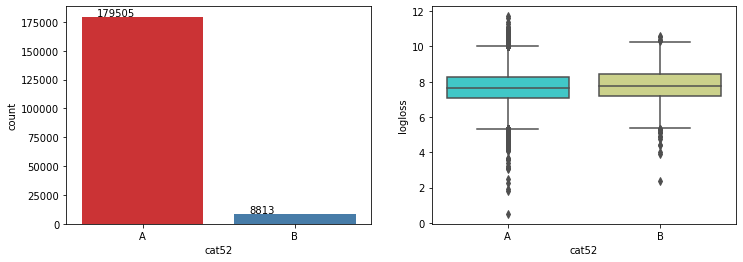

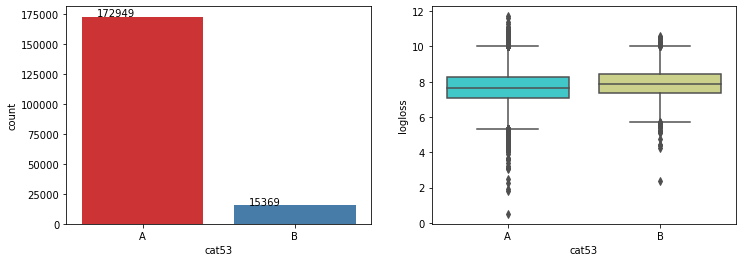

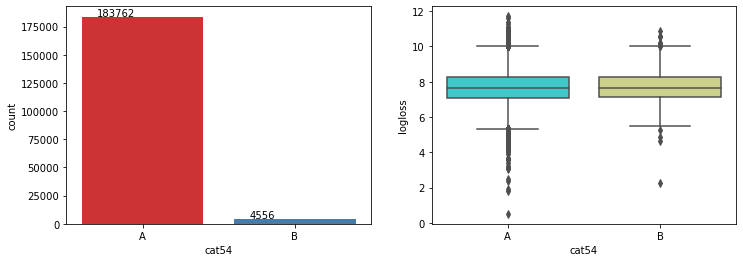

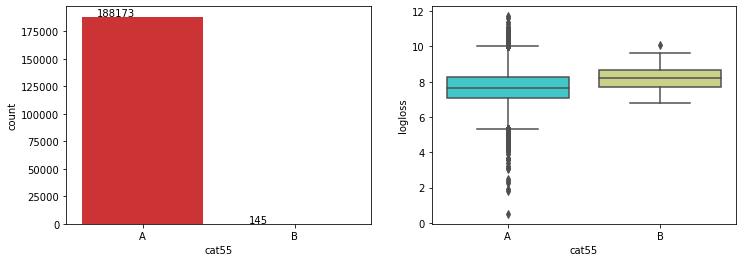

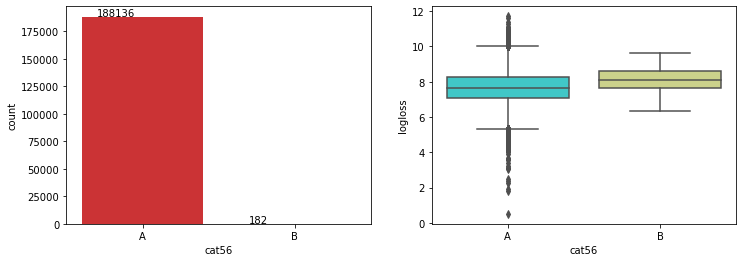

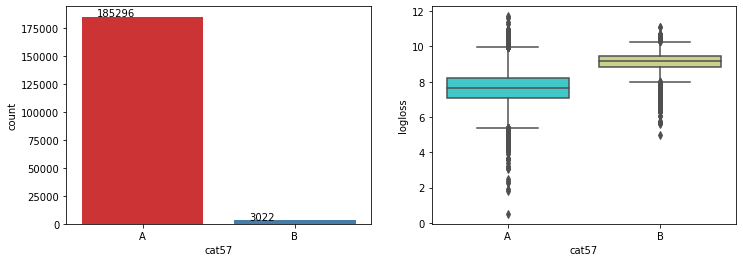

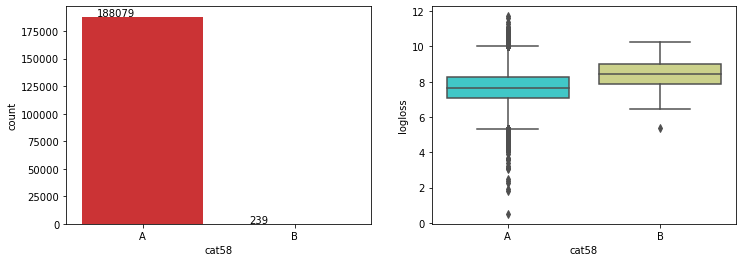

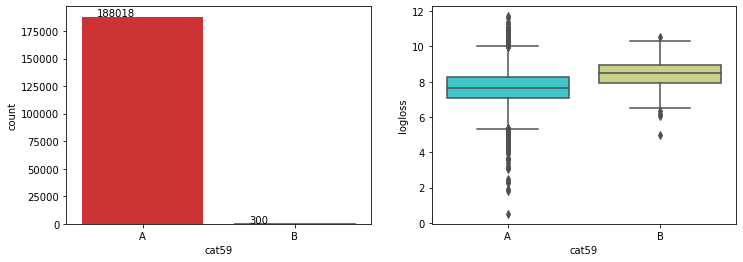

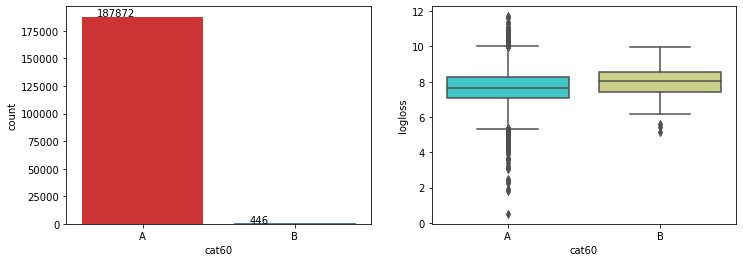

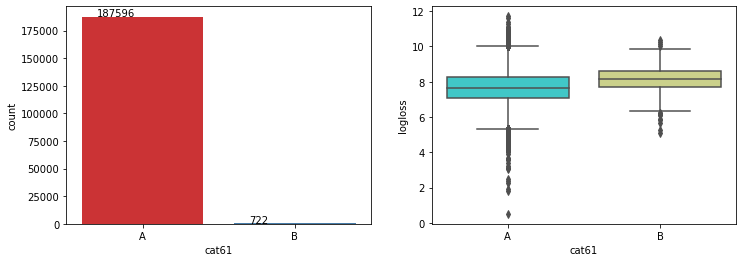

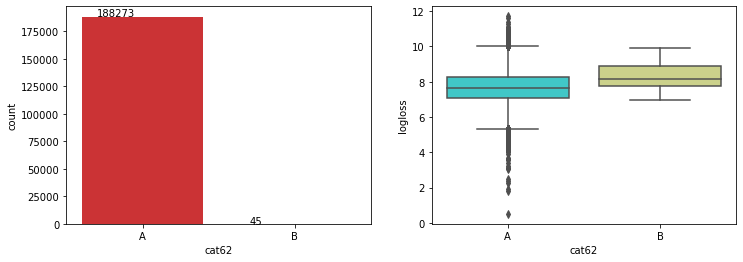

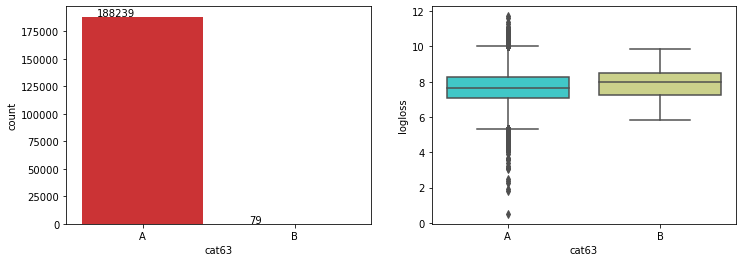

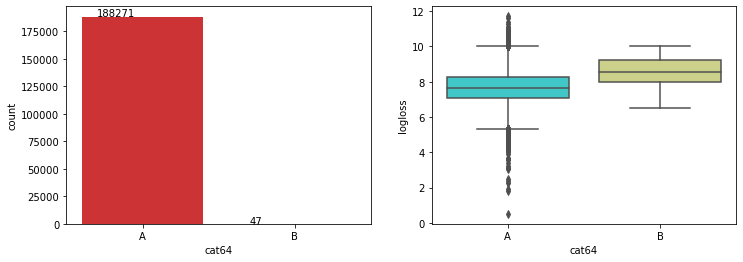

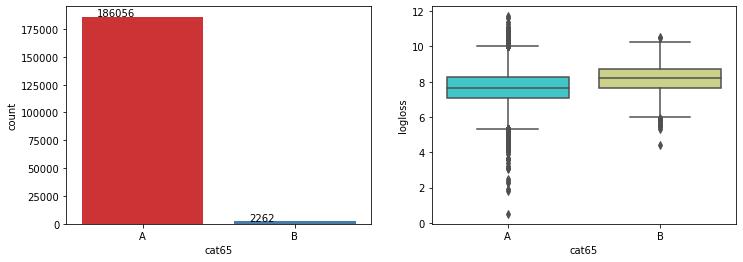

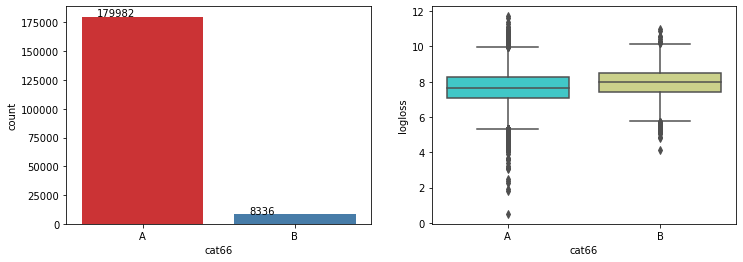

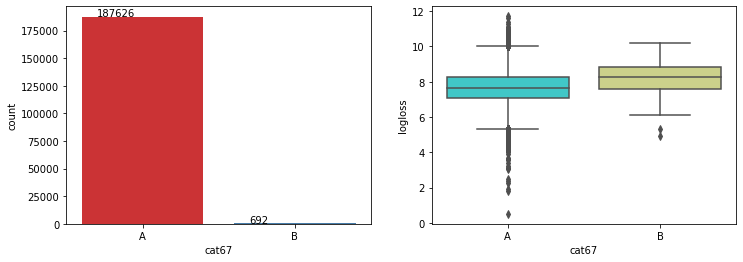

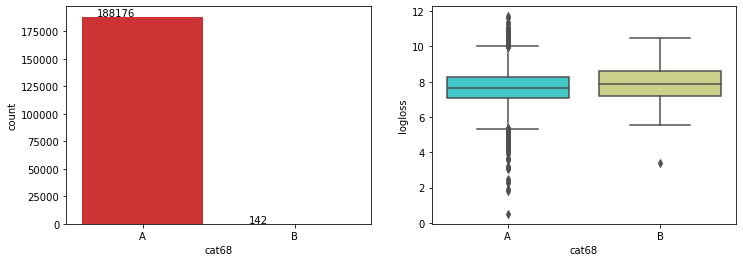

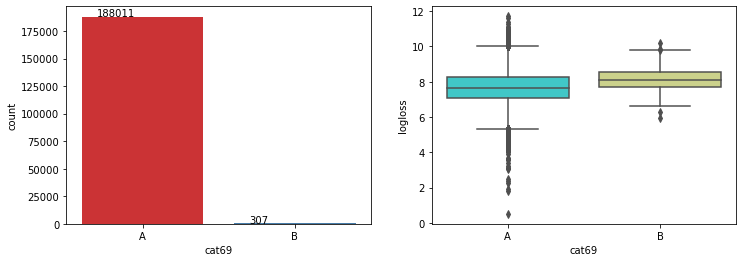

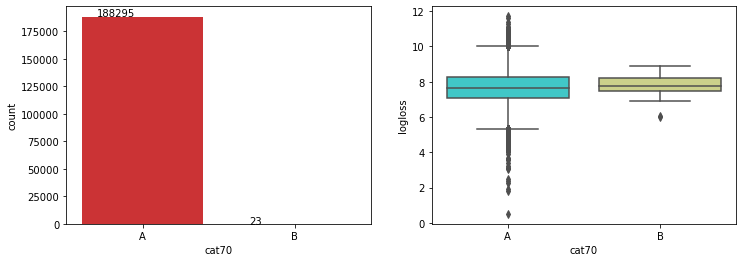

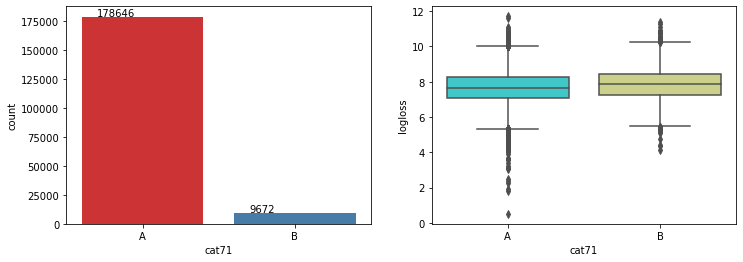

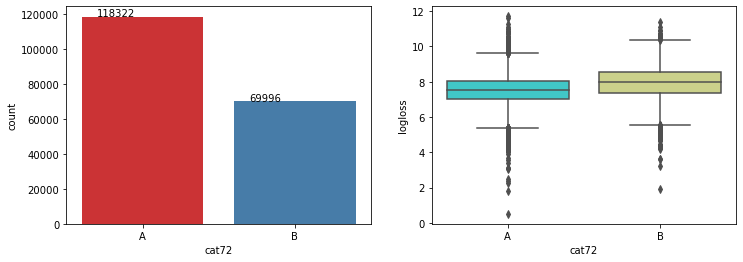

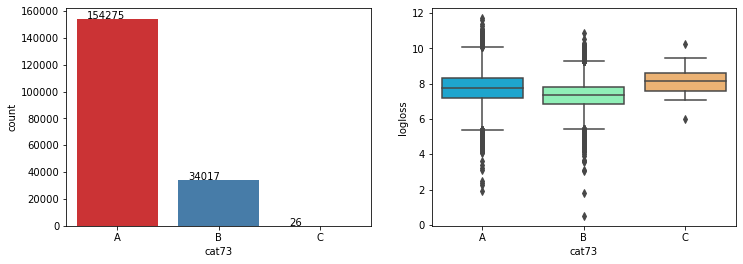

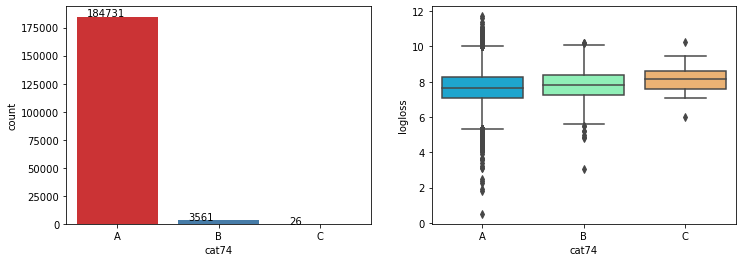

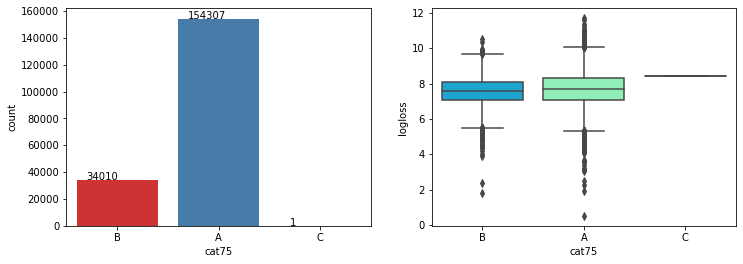

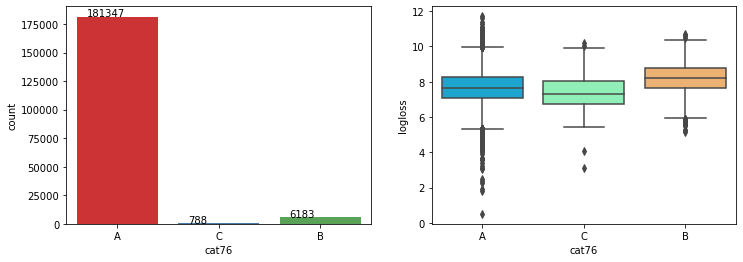

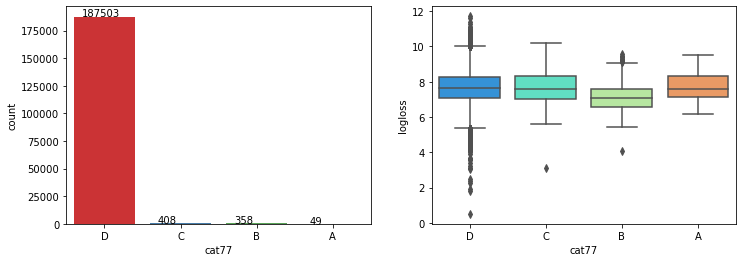

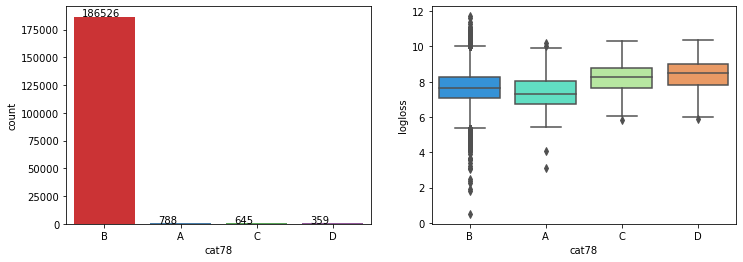

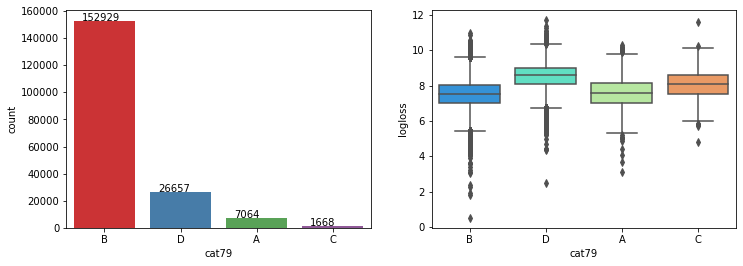

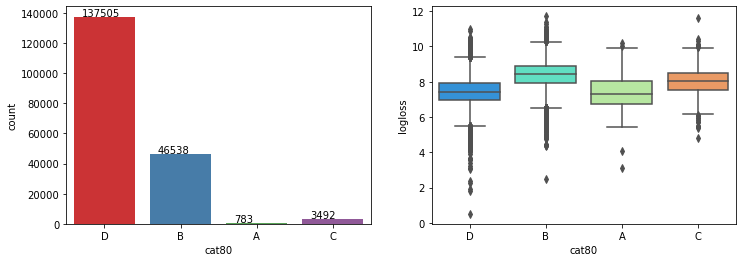

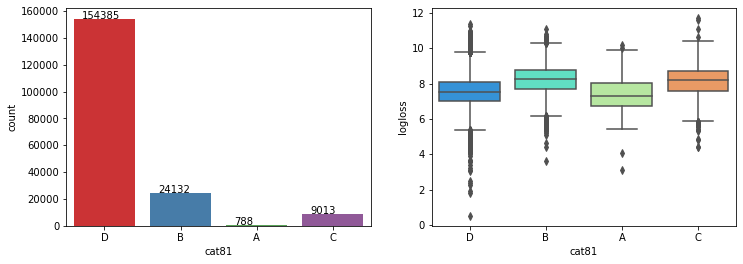

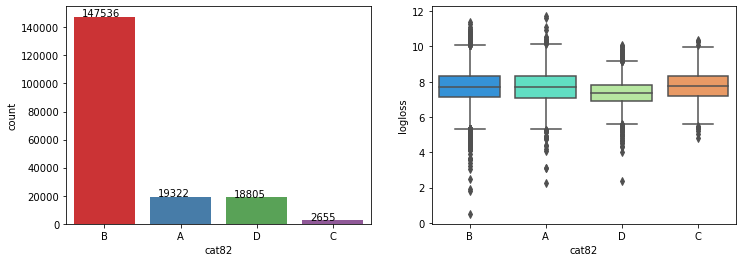

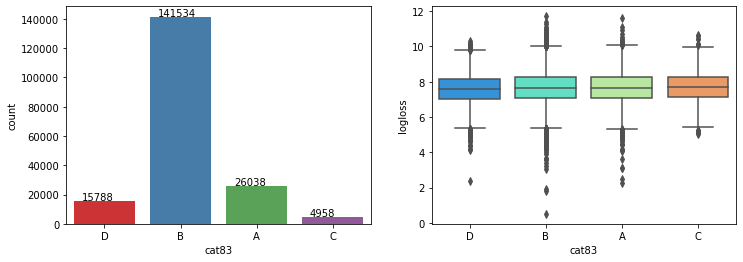

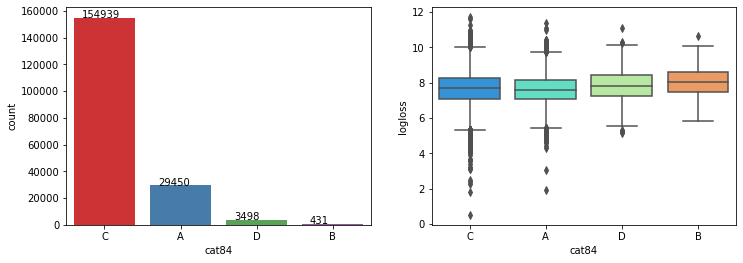

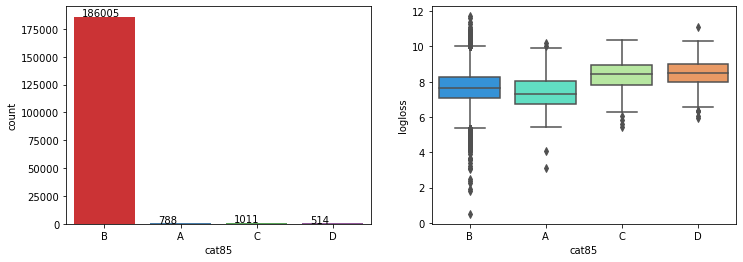

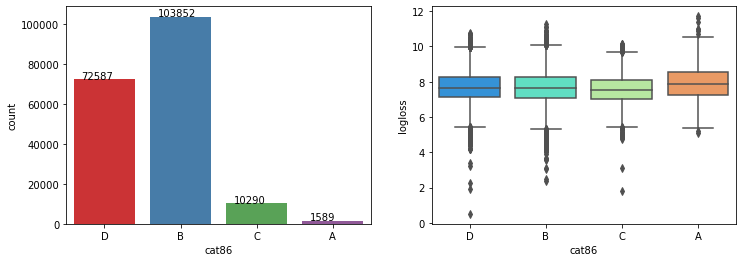

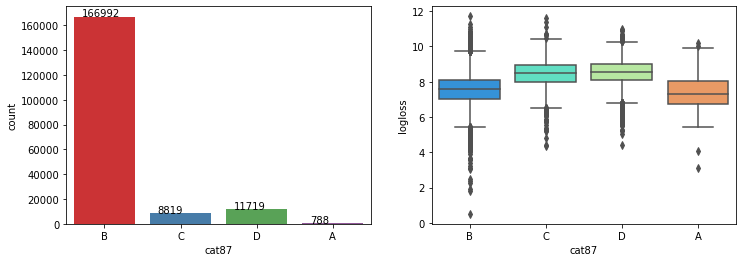

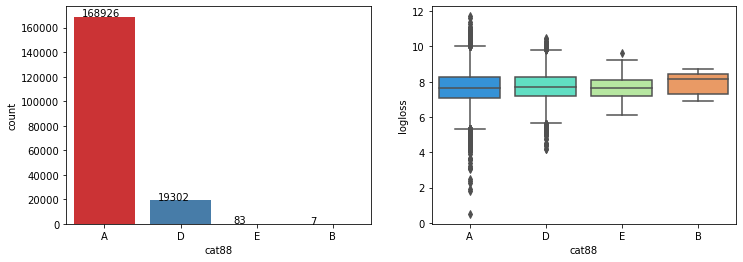

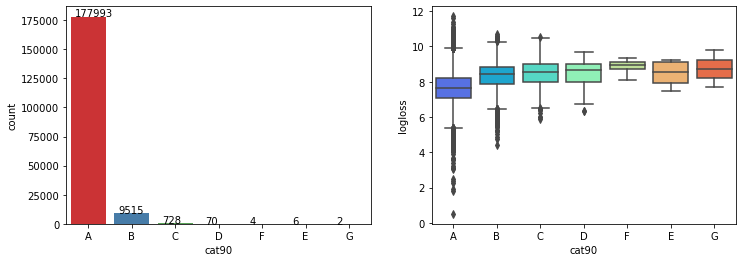

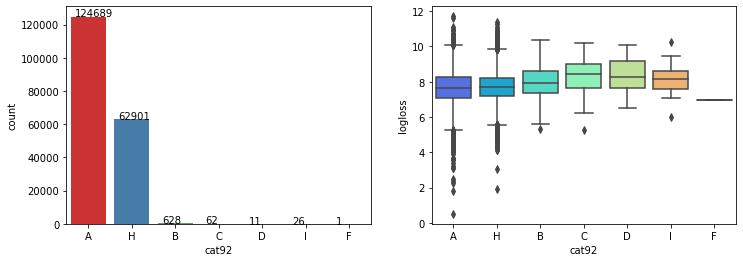

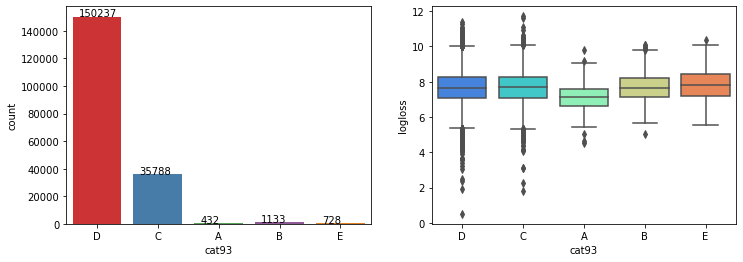

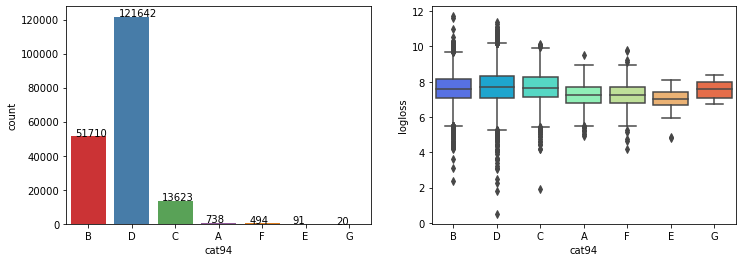

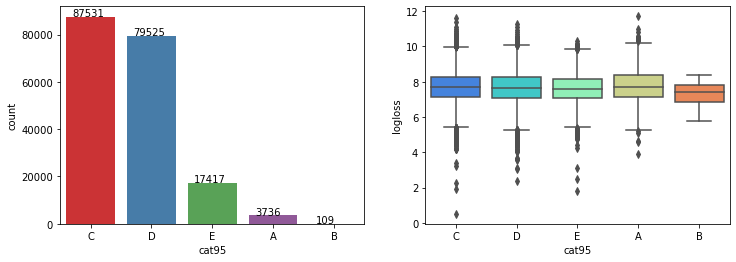

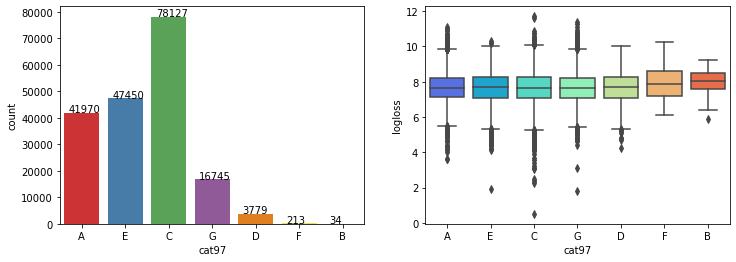

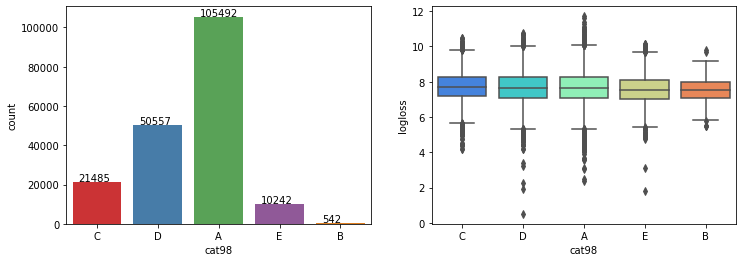

In [144]:
for cat in nlevels[nlevels < 8].index:
    
    fig, axes = plt.subplots(nrows=1,ncols=2, figsize = (12,4))
    
    sns.countplot(x = cat, data = train, palette = 'Set1',ax=axes[0])
    for p in axes[0].patches:
        axes[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
    
    sns.boxplot(data = train, x = cat, y = 'logloss',palette='rainbow', ax=axes[1])
    
    fig
    

##### Variables with difference in target values across categories - 29 vars 

cat1, cat2, cat3, cat7, cat10, cat11, cat12, cat13, cat14, cat16, cat17, cat48, cat51, cat53, cat55, cat57, cat58, cat59, cat64, cat72, cat73, cat74, cat76, cat77, cat79, cat80, cat81, cat84, cat85, cat87, cat90, cat92, cat94

# Preprocessing

## One hot encoding the categorical features 

In [74]:
#combine datasets before encoding
data = train
train = train[list(test)]
all_data = pd.concat((train, test))
all_data.shape

(313864, 131)

In [1]:
# perform one-hot encoding using get_dummies
dum_df = pd.get_dummies(all_data, columns=cat_features, prefix = cat_features  )
# print(dum_df.shape)
# print(dum_df.head())

In [2]:
# dum_df.columns[1000:1060]

#### Dropping the continuous variables that are highly correlated (detected using corr and vif) and the id variable 

In [77]:
dum_df = dum_df.drop(['id', 'cont12', 'cont6', 'cont1'], axis =1)

In [78]:
ytrain = data['logloss']
ytrain.head()

0    7.702637
1    7.158203
2    8.008396
3    6.846784
4    7.924742
Name: logloss, dtype: float64

In [79]:
print('train:', train.shape)
print('test:', test.shape)
Xtrain = dum_df[:len(train)]
Xtest = dum_df[len(train):]
print(Xtrain.shape, ytrain.shape, Xtest.shape)

train: (188318, 131)
test: (125546, 131)
(188318, 1187) (188318,) (125546, 1187)


## Storing processed data as a pickle file

In [80]:
import pickle

file = open('data_enc.pkl','wb')

pickle.dump(Xtrain, file)
pickle.dump(ytrain, file)
pickle.dump(Xtest, file)

file.close()

# file = open('data_enc.pkl', 'rb')
# Xtrain = pickle.load(file)
# ytrain = pickle.load(file)
# Xtest = pickle.load(file)

# file.close()